# DAV 6150 Final Project

# Exploring Socioeconomic and Housing Dynamics with Machine Learning to predict Household income

    Mahanth Dasari
    Minjae lee
    Rahul Kanth Panganamamula

## Abstract

This project explores socioeconomic and housing dynamics using the "American Community Survey 2022" data to predict household income levels. By integrating machine learning techniques with a meticulously selected subset of the dataset encompassing demographic, socioeconomic, and housing features, we aim to uncover significant patterns that influence economic outcomes. Through extensive data preprocessing and the application of various predictive models, the study identifies the XGBoost model as the most effective, offering high accuracy and robust performance. The findings suggest that machine learning can significantly aid in understanding and forecasting household income, providing valuable insights for economic planning and policy-making. This research not only highlights the potential of advanced analytics in socioeconomic contexts but also sets the stage for further explorations into improving predictive accuracies and expanding the analytical framework.

## Introduction

We are on a fascinating journey through data exploration and machine learning, our project aims to uncover hidden patterns and insights within a rich dataset derived from a comprehensive survey which is "AMERICAN COMMUNITY SURVEY 2022". This dataset is a treasure trove of information, encapsulating the nuances of demographic, socioeconomic, and housing characteristics across a diverse population. With a meticulous assembly of 241 columns and thousands of rows, each entry in this dataset represents a unique story, waiting to be told through the lens of data science.

Our dataset stands out not only for its volume but for the depth of information it contains. From basic demographic details like age and sex to more complex socioeconomic indicators such as income levels, educational attainment, and housing affordability, the dataset offers a panoramic view of the living conditions and societal structures within the surveyed region. Among the myriad of columns, we have judiciously selected 50 features that hold the key to unlocking a multitude of patterns and trends. These features span across various domains, including:

Demographic and Socioeconomic Features

    Age, Sex, Race, and Marital Status: These fundamental demographic attributes lay the groundwork for understanding population structure and social dynamics. They allow us to examine trends such as aging, gender disparities, racial diversity, and family composition.
    Household Income and Personal Income: These features are pivotal in assessing economic well-being and inequality. By analyzing income data, we can identify patterns of wealth distribution, poverty, and economic mobility.
    Educational Attainment: This indicator sheds light on the levels of education reached within the community, offering insights into access to education, lifelong earning potential, and societal value placed on education.
    Employment Status and Occupation Code: These variables help us understand labor market participation, industry sectors employing the population, and the nature of employment—full-time, part-time, or unemployed.
    Income-to-Poverty Ratio: An essential measure for identifying households that face economic hardship, enabling targeted studies on poverty and its impact on various life outcomes.

Housing and Living Conditions

    Property Value and Monthly Rent: These indicators provide a glimpse into the housing market, reflecting on affordability, housing quality, and the economic status of neighborhoods.
    Number of Bedrooms and Rooms: Insights from these features relate to living space, overcrowding, and the capacity of housing to meet family needs.
    Year Structure Built: This feature offers historical context, revealing patterns in housing development, urbanization, and potentially, the aging infrastructure.

Lifestyle and Expenses

    Vehicle Ownership: A proxy for mobility, access to services, and, indirectly, economic status.
    Monthly Utility Costs (Electricity, Gas, Water): These variables offer perspectives on living expenses, energy consumption, and the financial burden of utilities on households.
    Internet Access: In the digital age, internet access is a critical factor in educational opportunities, employment, and social connectivity.

Advanced Socioeconomic Indicators

    Public and Private Health Insurance Coverage: These features highlight healthcare accessibility and the role of public versus private support in ensuring health coverage.
    Disability Status: Understanding the prevalence and types of disabilities within the population can inform accessibility, policy, and support services.
    Military Service: Insights into the veteran population, addressing their unique needs, experiences, and contributions to society.

Our selection is designed not just for breadth but depth, allowing us to construct a multi-dimensional analysis that can address complex questions. By exploring these features through the lens of machine learning, we aim to uncover patterns that are not immediately visible, predict outcomes of interest, and generate insights that have tangible implications for policy-making, community support, and further research.


**Data Dictionary**

**Explanatory Variables:** 

        Demographic Variables: Age of the householder (AGEP), Sex (SEX), Marital Status (MAR), Number of Persons in the Household (NP).
    Housing Variables: Tenure (TEN, indicating whether the home is owned or rented), Number of Bedrooms (BDSP), Year Structure Built (YBL) as a proxy for housing quality.
    Employment Variables: Employment Status (EMP), Occupation (OCCP), Hours Worked Per Week (WKHP), Industry (INDP) as indicators of labor market engagement and sector.

### American Community Survey (ACS)

he American Community Survey (ACS) is an ongoing survey that provides vital information on a yearly basis about our nation and its people. Information from the survey generates data that help inform how trillions of dollars in federal funds are distributed each year.

ACS Information:
Through the ACS, we know more about jobs and occupations, educational attainment, veterans, whether people own or rent their homes, and other topics. Public officials, planners, and entrepreneurs use this information to assess the past and plan the future. When you respond to the ACS, you are doing your part to help your community plan for hospitals and schools, support school lunch programs, improve emergency services, build bridges, and inform businesses looking to add jobs and expand to new markets, and more.

## Research Questions

    1. Can we predict a household's income level based on demographic, housing, and employment characteristics?

## Data to be Used

Our Dataset consists of 241 columns (a.k.a Features), 819228 rows (a.k.a Records).

We have taken data from AMERICAN COMMUNITY SURVEY 2022 https://www.census.gov/programs-surveys/acs/about.html, downloaded the data from American Community Survey (ACS) Public Use Microdata Sample (PUMS) files to https://www.census.gov/programssurveys/acs/microdata/access.html.

Specifically from this location https://www2.census.gov/programs-surveys/acs/data/pums/2022/

we have downloaded the data and uploaded it into Our GIthub repository Using Github LFS

Because of data size and running time constraint we are taking into consideration of only first 26 states data only 

These are the states we are working on:

    AK - Alaska
    AL - Alabama
    AR - Arkansas
    AZ - Arizona
    CA - California
    CO - Colorado
    CT - Connecticut
    DC - District of Columbia
    DE - Delaware
    FL - Florida
    GA - Georgia
    HI - Hawaii
    IA - Iowa
    ID - Idaho
    IL - Illinois
    IN - Indiana
    KS - Kansas
    KY - Kentucky
    LA - Louisiana
    MA - Massachusetts
    MD - Maryland
    ME - Maine
    MI - Michigan
    MN - Minnesota
    MO - Missouri
    MS - Mississippi

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np

df= pd.read_csv("https://media.githubusercontent.com/media/rk18081999/final-project-rep/main/psam_husa.csv")

df.head()

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2022GQ0000031,6,2803,3,1,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
1,H,2022GQ0000111,6,2000,3,1,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
2,H,2022GQ0000200,6,2803,3,1,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
3,H,2022GQ0000261,6,1100,3,1,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
4,H,2022GQ0000296,6,1502,3,1,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2022GQ0000031,6,2803,3,1,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
1,H,2022GQ0000111,6,2000,3,1,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
2,H,2022GQ0000200,6,2803,3,1,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
3,H,2022GQ0000261,6,1100,3,1,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
4,H,2022GQ0000296,6,1502,3,1,1000000,1042311,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819223,H,2022HU1446030,6,800,3,28,1000000,1042311,40,2,...,77,15,30,82,87,51,53,8,69,57
819224,H,2022HU1446092,6,600,3,28,1000000,1042311,34,5,...,38,20,9,47,30,8,12,62,36,43
819225,H,2022HU1446243,6,1101,3,28,1000000,1042311,38,2,...,54,9,33,41,43,12,47,63,36,11
819226,H,2022HU1446341,6,1900,3,28,1000000,1042311,95,4,...,89,73,24,28,189,200,39,73,180,122


In [3]:
# Counting occurrences of each state
state_counts = df['ST'].value_counts()
state_counts

ST
6     167262
12    109767
17     59637
13     51568
26     51017
4      35630
25     35515
18     33089
8      28708
27     28639
24     28361
1      26532
22     23355
21     22482
9      18162
19     16581
5      15896
28     15246
20     14633
16      9083
23      8652
15      6487
10      4963
11      4064
2       3899
Name: count, dtype: int64

In [4]:
# Calculating the average count of state entries
average_count = state_counts.mean()
average_count

32769.12

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819228 entries, 0 to 819227
Columns: 241 entries, RT to WGTP80
dtypes: float64(149), int64(90), object(2)
memory usage: 1.5+ GB


**Filtering states which having more than 50 thousand records from the above count data.**

In [6]:
# Define the list of state values to filter
filter_states = [6, 12, 17, 13, 26]

# Filter the DataFrame for rows where the state column is in the list of state values
df1 = df[df['ST'].isin(filter_states)]

# Print the new DataFrame
print(df1)

       RT       SERIALNO  DIVISION  PUMA  REGION  ST   ADJHSG   ADJINC  WGTP  \
81957   H  2022GQ0000033         9  6509       4   6  1000000  1042311     0   
81958   H  2022GQ0000039         9  6501       4   6  1000000  1042311     0   
81959   H  2022GQ0000041         9  8101       4   6  1000000  1042311     0   
81960   H  2022GQ0000067         9  8303       4   6  1000000  1042311     0   
81961   H  2022GQ0000070         9  6712       4   6  1000000  1042311     0   
...    ..            ...       ...   ...     ...  ..      ...      ...   ...   
775338  H  2022HU1446365         3  2702       2  26  1000000  1042311    70   
775339  H  2022HU1446380         3   300       2  26  1000000  1042311    21   
775340  H  2022HU1446381         3  2102       2  26  1000000  1042311   112   
775341  H  2022HU1446453         3  3211       2  26  1000000  1042311    79   
775342  H  2022HU1446455         3  1100       2  26  1000000  1042311    28   

        NP  ...  WGTP71  WGTP72  WGTP73

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439251 entries, 81957 to 775342
Columns: 241 entries, RT to WGTP80
dtypes: float64(149), int64(90), object(2)
memory usage: 811.0+ MB


In [8]:
df1.isnull().sum()

RT          0
SERIALNO    0
DIVISION    0
PUMA        0
REGION      0
           ..
WGTP76      0
WGTP77      0
WGTP78      0
WGTP79      0
WGTP80      0
Length: 241, dtype: int64

In [9]:
# Printing the names of all columns in the DataFrame
print(df1.columns.tolist())

['RT', 'SERIALNO', 'DIVISION', 'PUMA', 'REGION', 'ST', 'ADJHSG', 'ADJINC', 'WGTP', 'NP', 'TYPEHUGQ', 'ACCESSINET', 'ACR', 'AGS', 'BATH', 'BDSP', 'BLD', 'BROADBND', 'COMPOTHX', 'CONP', 'DIALUP', 'ELEFP', 'ELEP', 'FS', 'FULFP', 'FULP', 'GASFP', 'GASP', 'HFL', 'HISPEED', 'HOTWAT', 'INSP', 'LAPTOP', 'MHP', 'MRGI', 'MRGP', 'MRGT', 'MRGX', 'OTHSVCEX', 'REFR', 'RMSP', 'RNTM', 'RNTP', 'RWAT', 'RWATPR', 'SATELLITE', 'SINK', 'SMARTPHONE', 'SMP', 'STOV', 'TABLET', 'TEL', 'TEN', 'VACDUR', 'VACOTH', 'VACS', 'VALP', 'VEH', 'WATFP', 'WATP', 'YRBLT', 'CPLT', 'FINCP', 'FPARC', 'GRNTP', 'GRPIP', 'HHL', 'HHLANP', 'HHLDRAGEP', 'HHLDRHISP', 'HHLDRRAC1P', 'HHT', 'HHT2', 'HINCP', 'HUGCL', 'HUPAC', 'HUPAOC', 'HUPARC', 'KIT', 'LNGI', 'MULTG', 'MV', 'NOC', 'NPF', 'NPP', 'NR', 'NRC', 'OCPIP', 'PARTNER', 'PLM', 'PLMPRP', 'PSF', 'R18', 'R60', 'R65', 'RESMODE', 'SMOCP', 'SMX', 'SRNT', 'SVAL', 'TAXAMT', 'WIF', 'WKEXREL', 'WORKSTAT', 'FACCESSP', 'FACRP', 'FAGSP', 'FBATHP', 'FBDSP', 'FBLDP', 'FBROADBNDP', 'FCOMPOTHXP'

* **Column Abbreviations:**
  * **RT**: Record Type
  * **SERIALNO**: Serial Number
  * **DIVISION**: Division Code
  * **PUMA**: Public Use Microdata Area
  * **REGION**: Region Code
  * **ST**: State Code
  * **ADJHSG**: Adjustment Factor for Housing
  * **ADJINC**: Adjustment Factor for Income
  * **WGTP**: Housing Unit Weight
  * **NP**: Number of Persons
  * **TYPEHUGQ**: Type of Housing Unit and Group Quarters
  * **ACCESSINET**: Access to the Internet
  * **ACR**: Acres
  * **AGS**: Agricultural Sales
  * **BATH**: Number of Bathrooms
  * **BDSP**: Number of Bedrooms
  * **BLD**: Type of Building
  * **BROADBND**: Broadband Subscription
  * **COMPOTHX**: Other Computer Equipment
  * **CONP**: Condo Fee
  * **DIALUP**: Dial-up Internet Subscription
  * **ELEFP**: Electricity Payment
  * **ELEP**: Electricity Cost
  * **FS**: Food Stamps/Supplemental Nutrition Assistance Program
  * **FULFP**: Fuel Payment
  * **FULP**: Fuel Cost
  * **GASFP**: Gas Payment
  * **GASP**: Gas Cost
  * **HFL**: Heating Fuel
  * **HISPEED**: High-Speed Internet Subscription
  * **HOTWAT**: Hot Water Cost
  * **INSP**: Insurance Cost
  * **LAPTOP**: Ownership of Laptop
  * **MHP**: Mobile Home Costs
  * **MRGI**: Monthly Rent as a Percentage of Income
  * **MRGP**: Monthly Rent Payment
  * **MRGT**: Mortgage Status
  * **MRGX**: Mortgage Payment as a Percentage of Income
  * **OTHSVCEX**: Other Service Expenditures
  * **REFR**: Refrigerator Availability
  * **RMSP**: Number of Rooms
  * **RNTM**: Rental Market
  * **RNTP**: Rent Payment
  * **RWAT**: Running Water Availability
  * **RWATPR**: Running Water Privacy
  * **SATELLITE**: Satellite Subscription
  * **SINK**: Sink Availability
  * **SMARTPHONE**: Smartphone Ownership
  * **SMP**: Sewer Maintenance Payment
  * **STOV**: Stove Availability
  * **TABLET**: Tablet Ownership
  * **TEL**: Telephone Service
  * **TEN**: Tenure
  * **VACDUR**: Vacancy Duration
  * **VACOTH**: Other Vacancy
  * **VACS**: Vacancy Status
  * **VALP**: Property Value
  * **VEH**: Number of Vehicles
  * **WATFP**: Water Payment
  * **WATP**: Water Cost
  * **YRBLT**: Year Built
  * **CPLT**: Completion Date
  * **FINCP**: Family Income
  * **FPARC**: Family Presence and Age of Related Children
  * **GRNTP**: Gross Rent as a Percentage of Household Income
  * **GRPIP**: Gross Rent as a Percentage of Income (Past 12 Months)
  * **HHL**: Household Language
  * **HHLANP**: Household Language Privacy
  * **HHLDRAGEP**: Age of Household Holder
  * **HHLDRHISP**: Hispanic Origin of Household Holder
  * **HHLDRRAC1P**: Race of Household Holder
  * **HHT**: Household Type
  * **HHT2**: Household Type 2
  * **HINCP**: Household Income
  * **HUGCL**: Housing Unit Garage
  * **HUPAC**: Household with Access
  * **HUPAOC**: Household with Other Characteristics
  * **HUPARC**: Household with Related Children
  * **KIT**: Kitchen Availability
  * **LNGI**: Longevity of Stay
  * **MULTG**: Multiple Generations Living in Household
  * **MV**: Mover
  * **NOC**: Number of Own Children
  * **NPF**: Number of Parents/Fathers in Household
  * **NPP**: Number of Parents/Parents in Household
  * **NR**: Naturalization Rights
  * **NRC**: Naturalization Rights for Children
  * **OCPIP**: Other Costs Paid by Inhabitants
  * **PARTNER**: Cohabitation Status
  * **PLM**: Plumbing Facilities
  * **PLMPRP**: Plumbing Problems
  * **PSF**: Presence of Selected Facilities
  * **R18**: Presence of Persons Under 18
  * **R60**: Presence of Persons Over 60
  * **R65**: Presence of Persons Over 65
  * **RESMODE**: Residence Mode
  * **SMOCP**: Selected Monthly Owner Costs as a Percentage of Income
  * **SMX**: Supplemental Matrix
  * **SRNT**: Supplemental Rent
  * **SVAL**: Supplemental Value
  * **TAXAMT**: Taxes Amount
  * **WIF**: Wife in Household
  * **WKEXREL**: Work Experience Relation
  * **WORKSTAT**: Work Status
  * **FACCESSP**: Flag for Access
  * **FACRP**: Flag for Acres
  * **FAGSP**: Flag for Agricultural Sales
  * **FBATHP**: Flag for Bathrooms
  * **FBDSP**: Flag for Bedrooms
  * **FBLDP**: Flag for Building Type
  * **FBROADBNDP**: Flag for Broadband Subscription
  * **FCOMOTHXP**: Flag for Other Computer Equipment
  * **FCONP**: Flag for Condo Fee
  * **FDIALUPP**: Flag for Dial-up Subscription
  * **FELEP**: Flag for Electricity Cost
  * **FFINCP**: Flag for Family Income
  * **FFSP**: Flag for Food Stamps
  * **FFULP**: Flag for Fuel Cost
  * **FGASP**: Flag for Gas Cost
  * **FGRNTP**: Flag for Gross Rent as a Percentage of Income
  * **FHFLP**: Flag for Heating Fuel
  * **FHINCP**: Flag for Household Income
  * **FHISPEEDP**: Flag for High-Speed Internet Subscription
  * **FHOTWATP**: Flag for Hot Water Cost
  * **FINSP**: Flag for Insurance
  * **FKITP**: Flag for Kitchen Availability
  * **FLAPTOPP**: Flag for Laptop Ownership
  * **FMHP**: Flag for Mobile Home Cost
  * **FMRGIP**: Flag for Monthly Rent as a Percentage of Income
  * **FMRGP**: Flag for Monthly Rent Payment
  * **FMRGTP**: Flag for Mortgage Status
  * **FMRGXP**: Flag for Mortgage Payment as a Percentage of Income
  * **FMVP**: Flag for Mover
  * **FOTHSVCEXP**: Flag for Other Service Expenditures
  * **FPLMP**: Flag for Plumbing Facilities
  * **FPLMPRP**: Flag for Plumbing Problems
  * **FREFRP**: Flag for Refrigerator Availability
  * **FRMSP**: Flag for Room Number
  * **FRNTMP**: Flag for Rental Market
  * **FRNTP**: Flag for Rent Payment
  * **FRWATP**: Flag for Running Water Availability
  * **FRWATPRP**: Flag for Running Water Privacy
  * **FSATELLITEP**: Flag for Satellite Subscription
  * **FSINKP**: Flag for Sink Availability
  * **FSMARTPHONP**: Flag for Smartphone Ownership
  * **FSMOCP**: Flag for Selected Monthly Owner Costs as a Percentage of Income
  * **FSMP**: Flag for Sewer Maintenance Payment
  * **FSMXHP**: Flag for Supplemental Matrix High
  * **FSMXSP**: Flag for Supplemental Matrix Standard
  * **FSTOVP**: Flag for Stove Availability
  * **FTABLETP**: Flag for Tablet Ownership
  * **FTAXP**: Flag for Taxes
  * **FTELP**: Flag for Telephone Service
  * **FTENP**: Flag for Tenure
  * **FVACDURP**: Flag for Vacancy Duration
  * **FVACOTHP**: Flag for Other Vacancy
  * **FVACSP**: Flag for Vacancy Status
  * **FVALP**: Flag for Property Value
  * **FVEHP**: Flag for Vehicles
  * **FWATP**: Flag for Water Cost
  * **FYRBLTP**: Flag for Year Built
  * **WGTP1** - **WGTP80**: Weights for Housing Units (1 through 80)

**As the Flagged and weighted data columns are not necessary for our analysis so we can remove those directly from our dataset before analysis**

In [10]:
# List of columns to remove
columns_to_remove = [
    'FACCESSP', 'FACRP', 'FAGSP', 'FBATHP', 'FBDSP', 'FBLDP', 'FBROADBNDP', 'FCOMPOTHXP',
    'FCONP', 'FDIALUPP', 'FELEP', 'FFINCP', 'FFSP', 'FFULP', 'FGASP', 'FGRNTP', 'FHFLP',
    'FHINCP', 'FHISPEEDP', 'FHOTWATP', 'FINSP', 'FKITP', 'FLAPTOPP', 'FMHP', 'FMRGIP',
    'FMRGP', 'FMRGTP', 'FMRGXP', 'FMVP', 'FOTHSVCEXP', 'FPLMP', 'FPLMPRP', 'FREFRP', 'FRMSP',
    'FRNTMP', 'FRNTP', 'FRWATP', 'FRWATPRP', 'FSATELLITEP', 'FSINKP', 'FSMARTPHONP', 'FSMOCP',
    'FSMP', 'FSMXHP', 'FSMXSP', 'FSTOVP', 'FTABLETP', 'FTAXP', 'FTELP', 'FTENP', 'FVACDURP',
    'FVACOTHP', 'FVACSP', 'FVALP', 'FVEHP', 'FWATP', 'FYRBLTP'
]

# Adding the weight columns to the list to remove (WGTP1 through WGTP80)
columns_to_remove.extend(['WGTP' + str(i) for i in range(1, 81)])

# Dropping the columns from the DataFrame
df1 = df1.drop(columns=columns_to_remove, errors='ignore')

# Print the cleaned DataFrame to see the remaining columns
print(df1.columns.tolist())

['RT', 'SERIALNO', 'DIVISION', 'PUMA', 'REGION', 'ST', 'ADJHSG', 'ADJINC', 'WGTP', 'NP', 'TYPEHUGQ', 'ACCESSINET', 'ACR', 'AGS', 'BATH', 'BDSP', 'BLD', 'BROADBND', 'COMPOTHX', 'CONP', 'DIALUP', 'ELEFP', 'ELEP', 'FS', 'FULFP', 'FULP', 'GASFP', 'GASP', 'HFL', 'HISPEED', 'HOTWAT', 'INSP', 'LAPTOP', 'MHP', 'MRGI', 'MRGP', 'MRGT', 'MRGX', 'OTHSVCEX', 'REFR', 'RMSP', 'RNTM', 'RNTP', 'RWAT', 'RWATPR', 'SATELLITE', 'SINK', 'SMARTPHONE', 'SMP', 'STOV', 'TABLET', 'TEL', 'TEN', 'VACDUR', 'VACOTH', 'VACS', 'VALP', 'VEH', 'WATFP', 'WATP', 'YRBLT', 'CPLT', 'FINCP', 'FPARC', 'GRNTP', 'GRPIP', 'HHL', 'HHLANP', 'HHLDRAGEP', 'HHLDRHISP', 'HHLDRRAC1P', 'HHT', 'HHT2', 'HINCP', 'HUGCL', 'HUPAC', 'HUPAOC', 'HUPARC', 'KIT', 'LNGI', 'MULTG', 'MV', 'NOC', 'NPF', 'NPP', 'NR', 'NRC', 'OCPIP', 'PARTNER', 'PLM', 'PLMPRP', 'PSF', 'R18', 'R60', 'R65', 'RESMODE', 'SMOCP', 'SMX', 'SRNT', 'SVAL', 'TAXAMT', 'WIF', 'WKEXREL', 'WORKSTAT']


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439251 entries, 81957 to 775342
Columns: 104 entries, RT to WORKSTAT
dtypes: float64(93), int64(9), object(2)
memory usage: 351.9+ MB


* **From the columns we have, we have mainly focused to predict household income based on demographic, housing, employment characteristics of each house.**

* **Demographic characteristics for consideration:**
  * **HHL**: Household Language
  * **HHLANP**: Household Language Privacy
  * **HHLDRAGEP**: Age of Household Holder
  * **HHLDRHISP**: Hispanic Origin of Household Holder
  * **HHLDRRAC1P**: Race of Household Holder
  * **HHT**: Household Type
  * **HHT2**: Household Type 2
  * **HINCP**: Household Income
  * **FINCP**: Family Income
  * **NOC**: Number of Own Children
  * **NPF**: Number of Parents/Fathers in Household
  * **NPP**: Number of Parents/Parents in Household
  * **OCPIP**: Other Costs Paid by Inhabitants
  * **PARTNER**: Cohabitation Status
  * **R18**: Presence of Persons Under 18
  * **R60**: Presence of Persons Over 60
  * **R65**: Presence of Persons Over 65
  * **RESMODE**: Residence Mode
  * **WORKSTAT**: Work Status
  * **MULTG**: Multiple Generations Living in Household

* **Housing characteristics for consideration:**
  * **TYPEHUGQ**: Type of Housing Unit and Group Quarters
  * **ACR**: Acres
  * **BLD**: Type of Building
  * **CONP**: Condo Fee
  * **ELEP**: Electricity Cost
  * **FULP**: Fuel Cost
  * **GASP**: Gas Cost
  * **HFL**: Heating Fuel
  * **INSP**: Insurance Cost
  * **RWAT**: Running Water Availability
  * **RWATPR**: Running Water Privacy
  * **VALP**: Property Value
  * **VEH**: Number of Vehicles
  * **YRBLT**: Year Built
  * **VACDUR**: Vacancy Duration
  * **VACS**: Vacancy Status
  * **TEN**: Tenure
  * **RMSP**: Number of Rooms
  * **KIT**: Kitchen Availability
  * **PLM**: Plumbing Facilities
  * **HUPAC**: Household with Access
  * **HUPAOC**: Household with Other Characteristics
  * **HUPARC**: Household with Related Children
  * **HUGCL**: Housing Unit Garage
  * **SMOCP**: Selected Monthly Owner Costs as a Percentage of Income

* **Employment Characteristics:**
  * **WKEXREL**: Work Experience Relation
o Works a Percentage of Incomeons Living in Household

**Now here im considering the columns of our interest**

In [447]:
selected_columns = ['NPF', 'NOC', 'HHT', 'HHT2', 'HHLDRRAC1P', 'OCPIP', 'HINCP', 'HHLDRHISP','RNTP', 'ELEP', 'SMOCP', 'TEN', 'VALP', 'TYPEHUGQ', 'WORKSTAT', 'WKEXREL', 'HHLDRAGEP', 'ST', 'NP', 'ACR', 'BLD', 'INSP', 'VEH', 'YRBLT', 'RMSP','BDSP','WIF']

df2= df1[selected_columns]
df2.head(100)

,NPF,NOC,HHT,HHT2,HHLDRRAC1P,OCPIP,HINCP,HHLDRHISP,RNTP,ELEP,...,ST,NP,ACR,BLD,INSP,VEH,YRBLT,RMSP,BDSP,WIF
81957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [448]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439251 entries, 81957 to 775342
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NPF         241042 non-null  float64
 1   NOC         362916 non-null  float64
 2   HHT         362916 non-null  float64
 3   HHT2        362916 non-null  float64
 4   HHLDRRAC1P  362916 non-null  float64
 5   OCPIP       253314 non-null  float64
 6   HINCP       362916 non-null  float64
 7   HHLDRHISP   362916 non-null  float64
 8   RNTP        106486 non-null  float64
 9   ELEP        350138 non-null  float64
 10  SMOCP       255796 non-null  float64
 11  TEN         362916 non-null  float64
 12  VALP        258382 non-null  float64
 13  TYPEHUGQ    439251 non-null  int64  
 14  WORKSTAT    238547 non-null  float64
 15  WKEXREL     241042 non-null  float64
 16  HHLDRAGEP   362916 non-null  float64
 17  ST          439251 non-null  int64  
 18  NP          439251 non-null  int64  
 19  ACR

In [449]:
df2.describe()

,NPF,NOC,HHT,HHT2,HHLDRRAC1P,OCPIP,HINCP,HHLDRHISP,RNTP,ELEP,...,ST,NP,ACR,BLD,INSP,VEH,YRBLT,RMSP,BDSP,WIF
count,241042.000000,362916.000000,362916.000000,362916.000000,362916.000000,253314.000000,3.629160e+05,362916.000000,106486.000000,350138.000000,...,439251.000000,439251.000000,299524.000000,390516.000000,255796.000000,362916.000000,390516.000000,390516.000000,390516.000000,241042.00000
mean,3.010338,0.416752,2.720376,4.197781,2.885423,24.707861,1.123929e+05,1.799061,1541.148489,189.540838,...,12.137550,2.157939,1.216824,3.151121,1450.071635,1.875415,1974.428008,5.831349,2.768038,1.45702
std,1.303867,0.880777,2.033966,3.045304,3.010316,23.038059,1.282728e+05,3.170422,996.109367,234.450404,...,6.321845,1.507947,0.490787,2.255273,1508.880391,1.085650,22.471113,2.407254,1.122458,0.93287
min,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.640000e+04,1.000000,4.000000,4.000000,...,6.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1939.000000,1.000000,0.000000,0.00000
25%,2.000000,0.000000,1.000000,2.000000,1.000000,10.000000,3.902000e+04,1.000000,860.000000,90.000000,...,6.000000,1.000000,1.000000,2.000000,590.000000,1.000000,1960.000000,4.000000,2.000000,1.00000
50%,3.000000,0.000000,1.000000,2.000000,1.000000,17.000000,7.780000e+04,1.000000,1400.000000,150.000000,...,12.000000,2.000000,1.000000,2.000000,1100.000000,2.000000,1970.000000,6.000000,3.000000,2.00000
75%,4.000000,0.000000,4.000000,6.000000,6.000000,29.000000,1.382000e+05,1.000000,2000.000000,230.000000,...,17.000000,3.000000,1.000000,3.000000,1800.000000,2.000000,1990.000000,7.000000,3.000000,2.00000
max,17.000000,13.000000,7.000000,12.000000,9.000000,101.000000,2.481200e+06,24.000000,6500.000000,2700.000000,...,26.000000,20.000000,3.000000,10.000000,10000.000000,6.000000,2022.000000,19.000000,7.000000,3.00000


**Plotting a histogram for household income**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


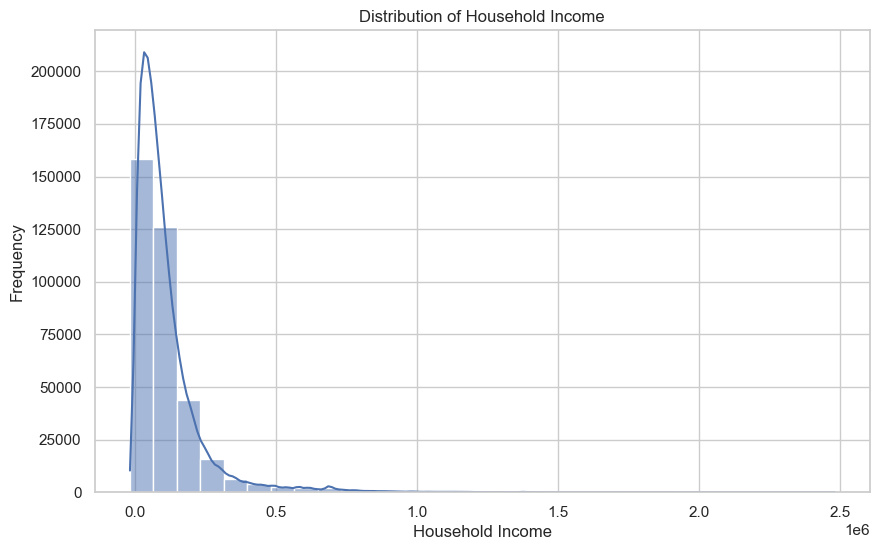

In [450]:

plt.figure(figsize=(10, 6))
sns.histplot(df2['HINCP'], kde=True, bins=30)
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.show()

**To Understand how the household income is varied accross the household type**

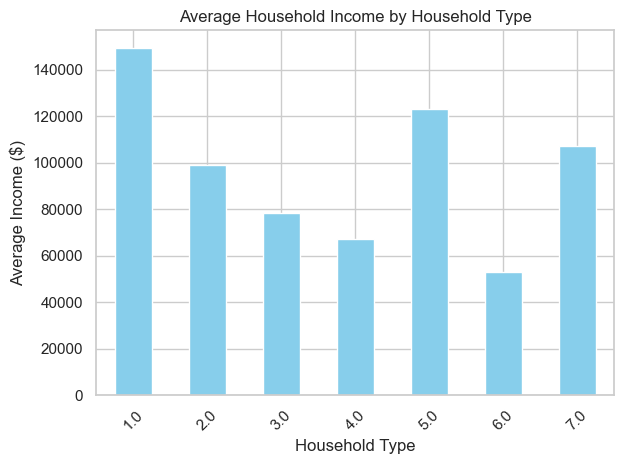

In [451]:
# Compute average income by household type
average_income_by_type = df2.groupby('HHT')['HINCP'].mean()

# Plotting
average_income_by_type.plot(kind='bar', color='skyblue')
plt.xlabel('Household Type')
plt.ylabel('Average Income ($)')
plt.title('Average Household Income by Household Type')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

**To understand household income is varied accross the household type 2**

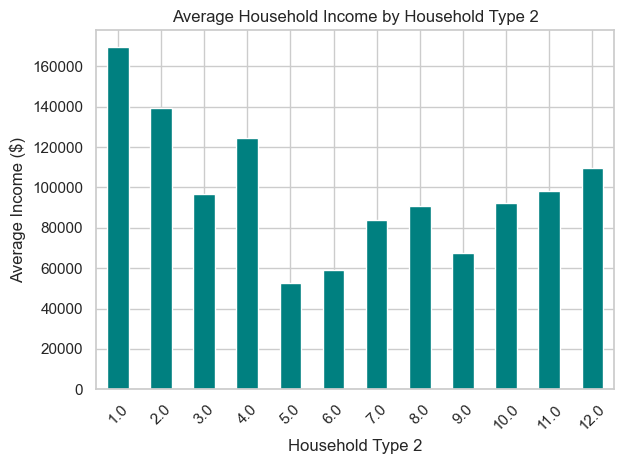

In [452]:
# Calculate average income by household type 2
average_income_by_hht2 = df2.groupby('HHT2')['HINCP'].mean()

# Plotting
average_income_by_hht2.plot(kind='bar', color='teal')
plt.xlabel('Household Type 2')
plt.ylabel('Average Income ($)')
plt.title('Average Household Income by Household Type 2')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [453]:
unique_values = df2['HHLDRRAC1P'].unique()
unique_values

array([nan,  6.,  1.,  9.,  2.,  8.,  3.,  5.,  7.,  4.])

The American Community Survey (ACS) uses specific numerical codes to represent race in its data collection. These codes typically correspond to the following racial categories:
* "0": "N/A (GQ/vacant)",
* "1": "White alone",
* "2": "Black or African American alone",
* "3": "American Indian alone",
* "4": "Alaska Native alone",
* "5": "American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races",
* "6": "Asian alone",
* "7": "Native Hawaiian and Other Pacific Islander alone",
* "8": "Some Other Race alone",
* "9": "Two or More Races"em 3r dataset)

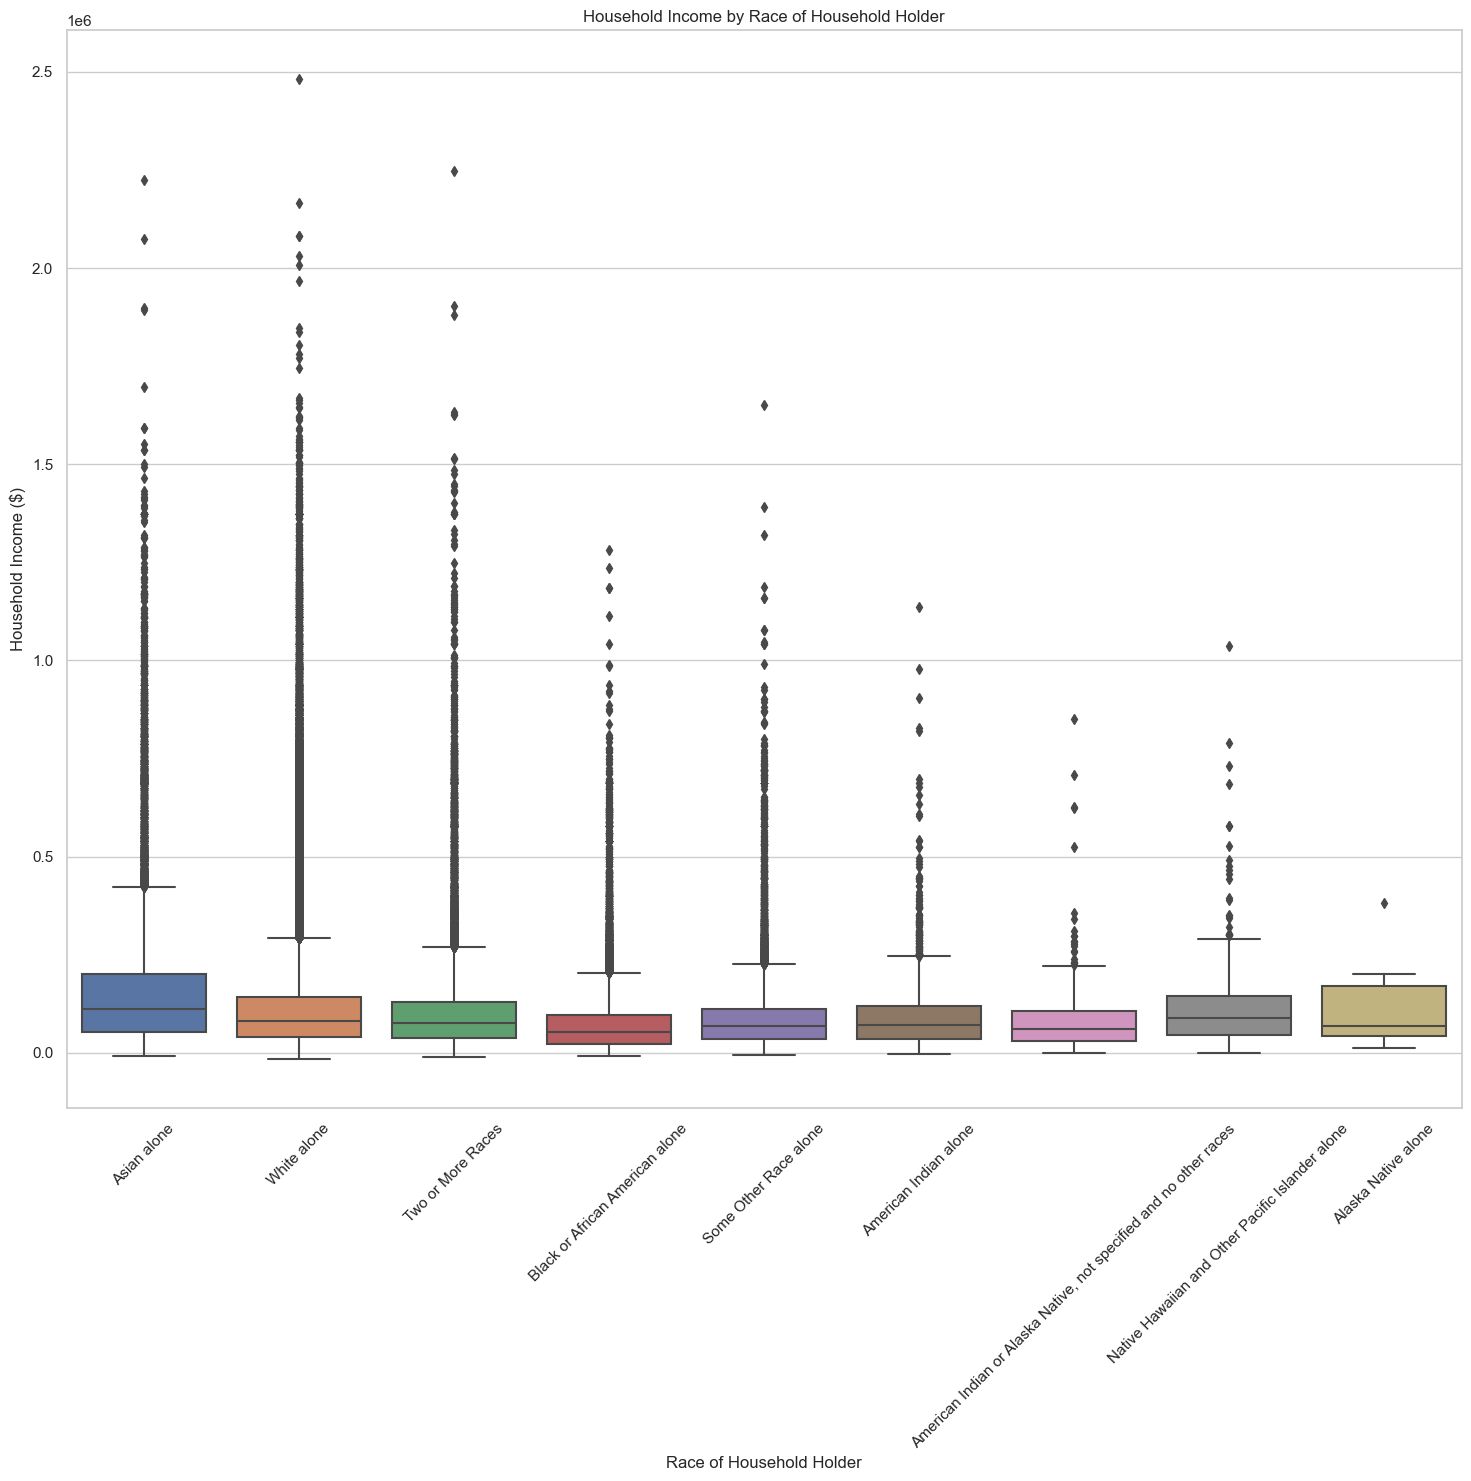

In [454]:
df3 = df2.copy()
race_labels = {
    0: "N/A (GQ/vacant)",
    1: "White alone",
    2: "Black or African American alone",
    3: "American Indian alone",
    4: "Alaska Native alone",
    5: "American Indian or Alaska Native, not specified and no other races",
    6: "Asian alone",
    7: "Native Hawaiian and Other Pacific Islander alone",
    8: "Some Other Race alone",
    9: "Two or More Races"
}

df3['HHLDRRAC1P'] = df3['HHLDRRAC1P'].map(race_labels)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(18, 14))
sns.boxplot(x='HHLDRRAC1P', y='HINCP', data=df3)
plt.title('Household Income by Race of Household Holder')
plt.xlabel('Race of Household Holder')
plt.ylabel('Household Income ($)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

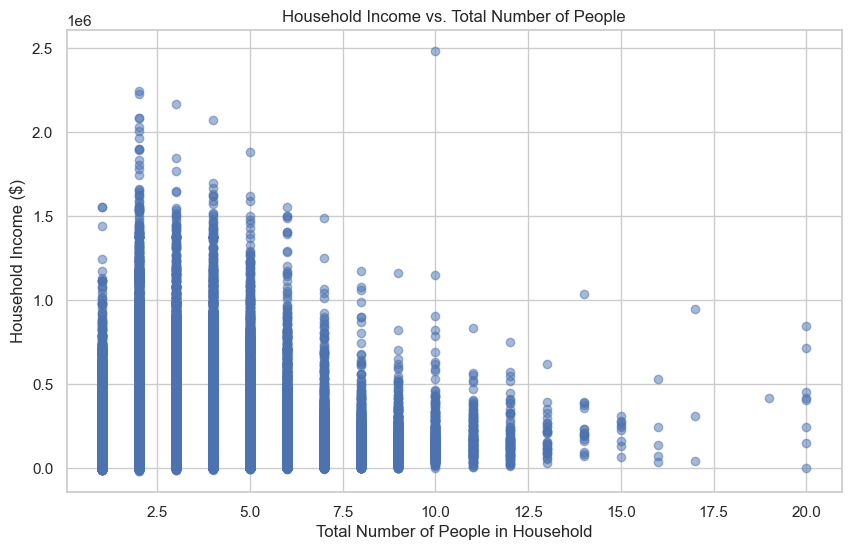

In [455]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df2['NP'], df2['HINCP'], alpha=0.5)
plt.title('Household Income vs. Total Number of People')
plt.xlabel('Total Number of People in Household')
plt.ylabel('Household Income ($)')
plt.grid(True)
plt.show()

In [456]:
df2['TYPEHUGQ'].unique()

array([3, 2, 1], dtype=int64)

In the American Community Survey (ACS), the variable TYPEHUGQ refers to the "Type of Housing Unit and Group Quarters." This variable categorizes residences into three types:

* Housing Units: This refers to standard housing such as houses, apartments, mobile homes, and other forms of housing that are intended as separate living quarters.
* Institutional Group Quarters: These include places like nursing homes, prisons, and mental hospitals where residents are under organized care or custody.
* Non-Institutional Group Quarters: These include less regulated environments such as college dormitories, military barracks, group homes, and shelters.ers.

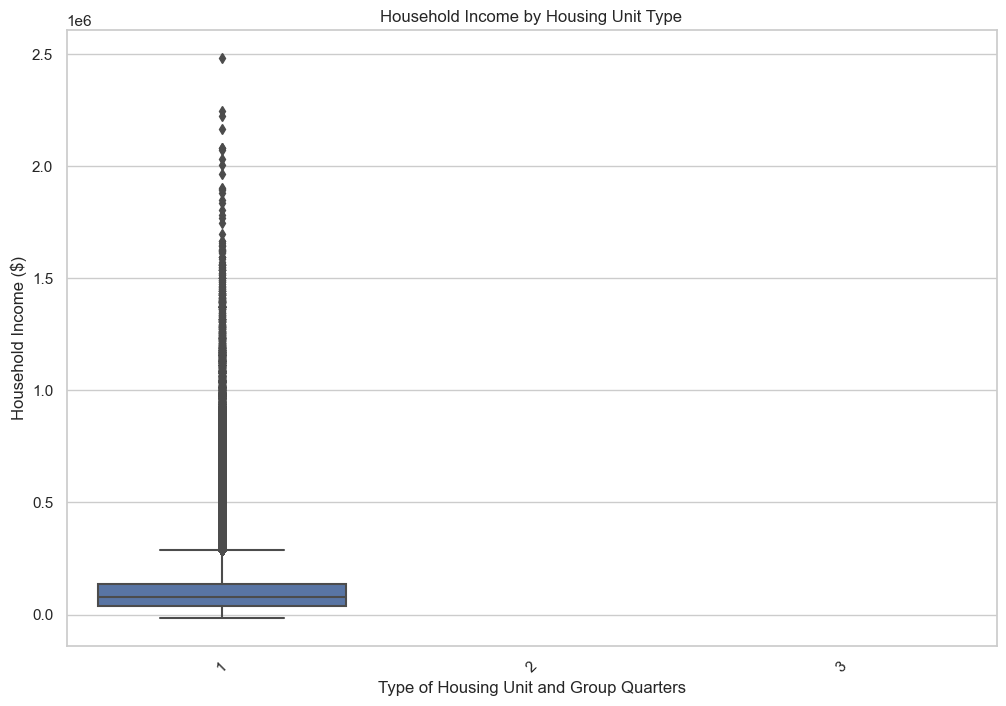

In [457]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x='TYPEHUGQ', y='HINCP', data=df2)
plt.title('Household Income by Housing Unit Type')
plt.xlabel('Type of Housing Unit and Group Quarters')
plt.ylabel('Household Income ($)')
plt.xticks(rotation=45)  # Rotate labels if they overlap or for better readability
plt.show()

In [458]:
df2['BLD'].unique()

array([nan,  9.,  2.,  7.,  3.,  4.,  8.,  1.,  6.,  5., 10.])

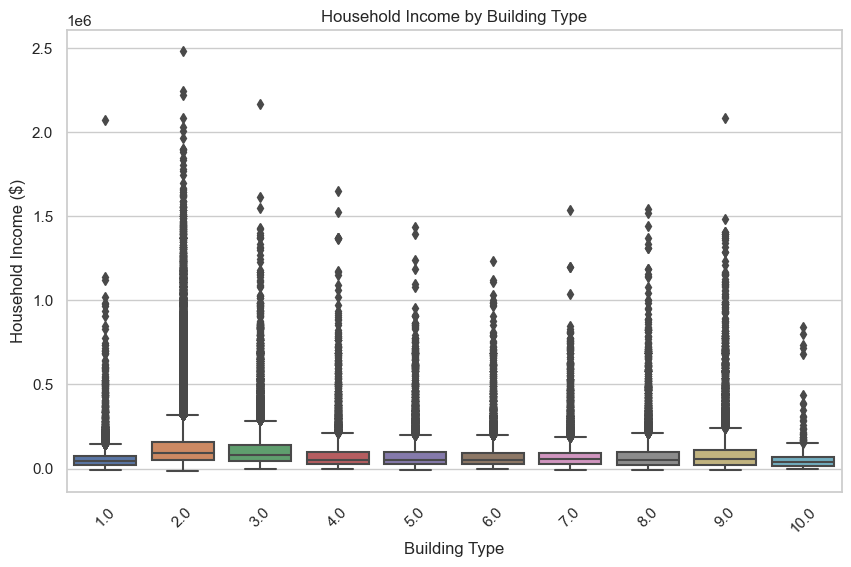

In [459]:
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='BLD', y='HINCP', data=df2)
plt.title('Household Income by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Household Income ($)')
plt.xticks(rotation=45)  
plt.show()

In [460]:
df2['RMSP'].unique()

array([nan,  3.,  7.,  6.,  4.,  8.,  9., 10.,  2.,  5., 12.,  1., 15.,
       11., 13., 19., 14., 16., 17.])

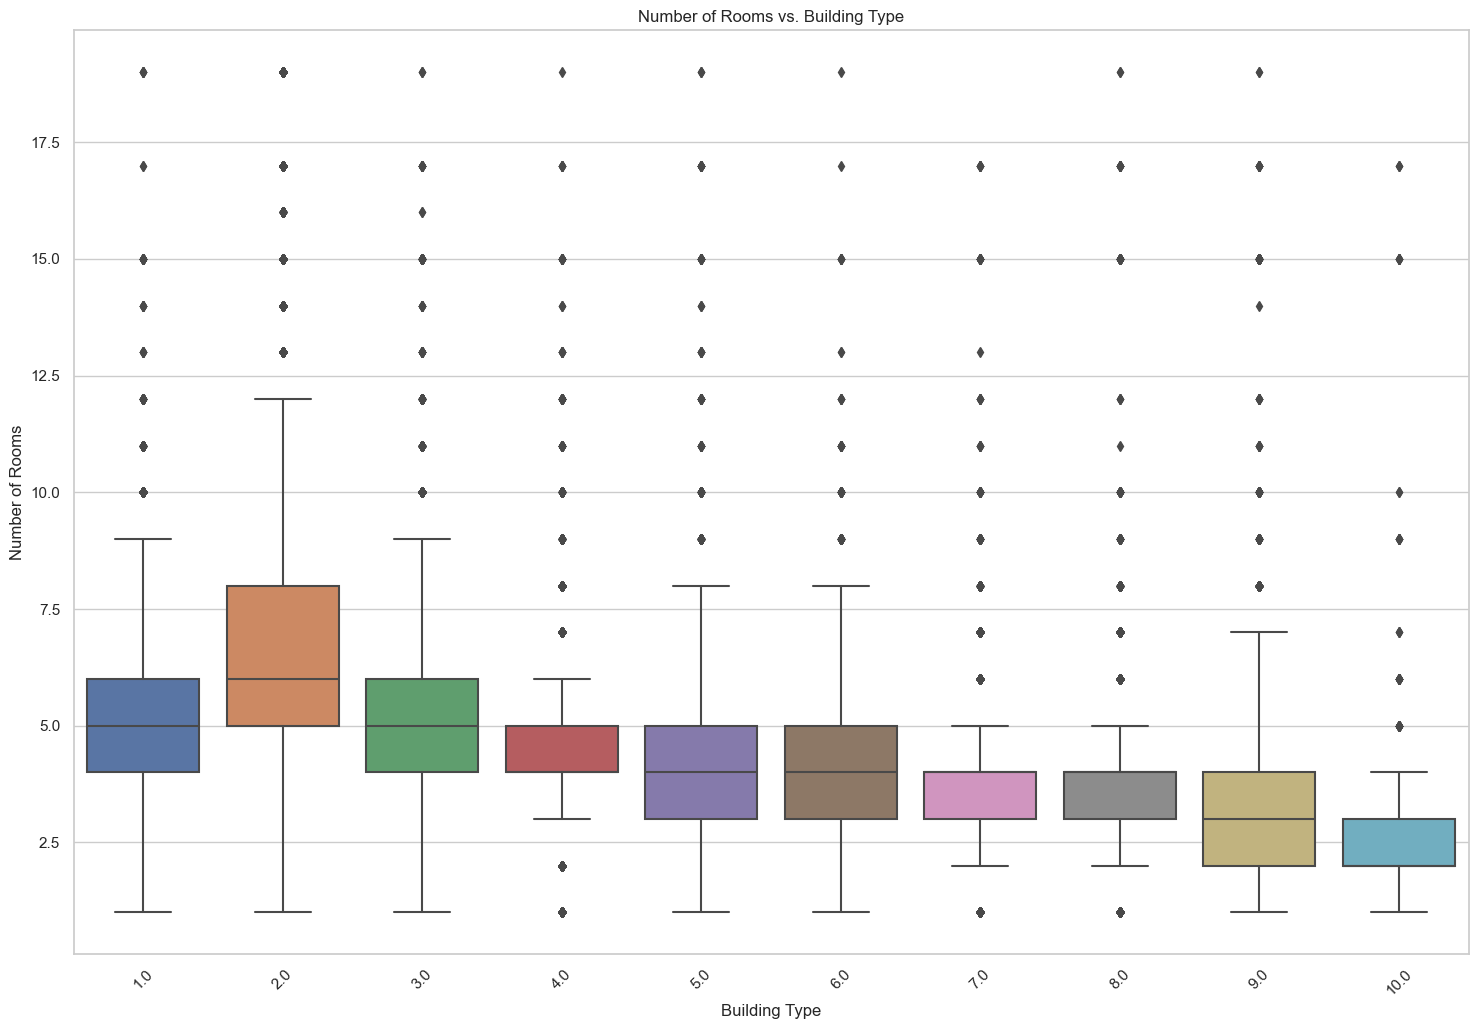

In [461]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(18, 12))
scatter_plot = sns.boxplot(x='BLD', y='RMSP', data=df2)
plt.title('Number of Rooms vs. Building Type')
plt.xlabel('Building Type')
plt.ylabel('Number of Rooms')
plt.xticks(rotation=45)  # Adjust if necessary for better label readability
plt.show()

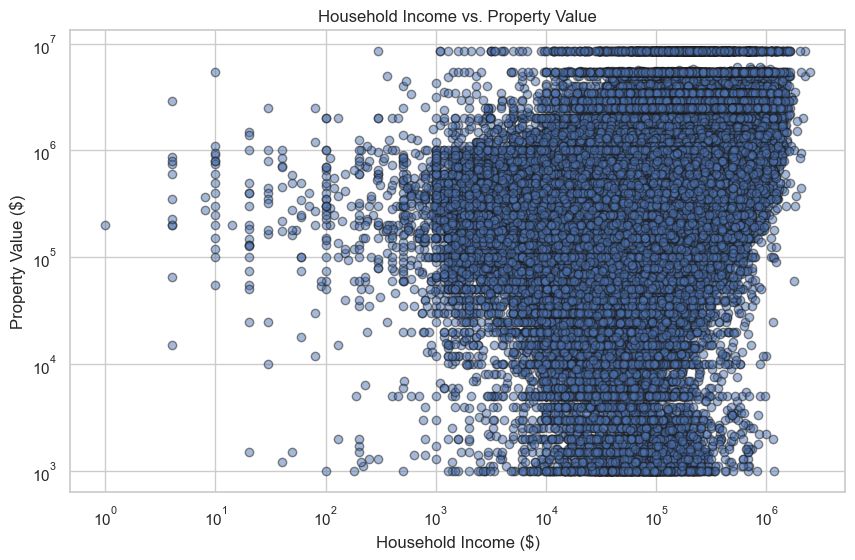

In [462]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['HINCP'], df2['VALP'], alpha=0.5, edgecolor='k')
plt.title('Household Income vs. Property Value')
plt.xlabel('Household Income ($)')
plt.ylabel('Property Value ($)')
plt.xscale('log')  # Use logarithmic scale if the data is highly skewed
plt.yscale('log')
plt.grid(True)
plt.show()

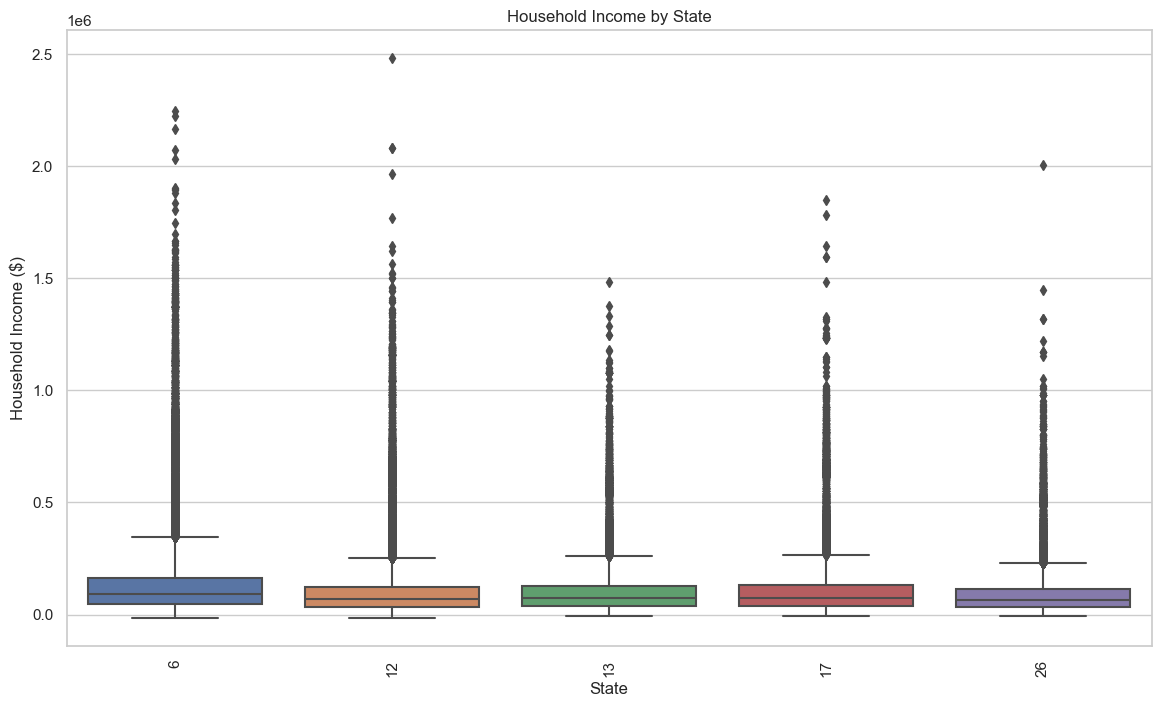

In [463]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='ST', y='HINCP', data=df2)
plt.title('Household Income by State')
plt.xlabel('State')
plt.ylabel('Household Income ($)')
plt.xticks(rotation=90)
plt.show()

In [464]:
# Map the WIF codes to descriptive labels
wif_labels = {
    0: "No workers",
    1: "1 worker",
    2: "2 workers",
    3: "3 or more workers in family",
    -1: "N/A (GQ/vacant/non-family household)"
}
df3['WIF_Label'] = df3['WIF'].map(wif_labels)

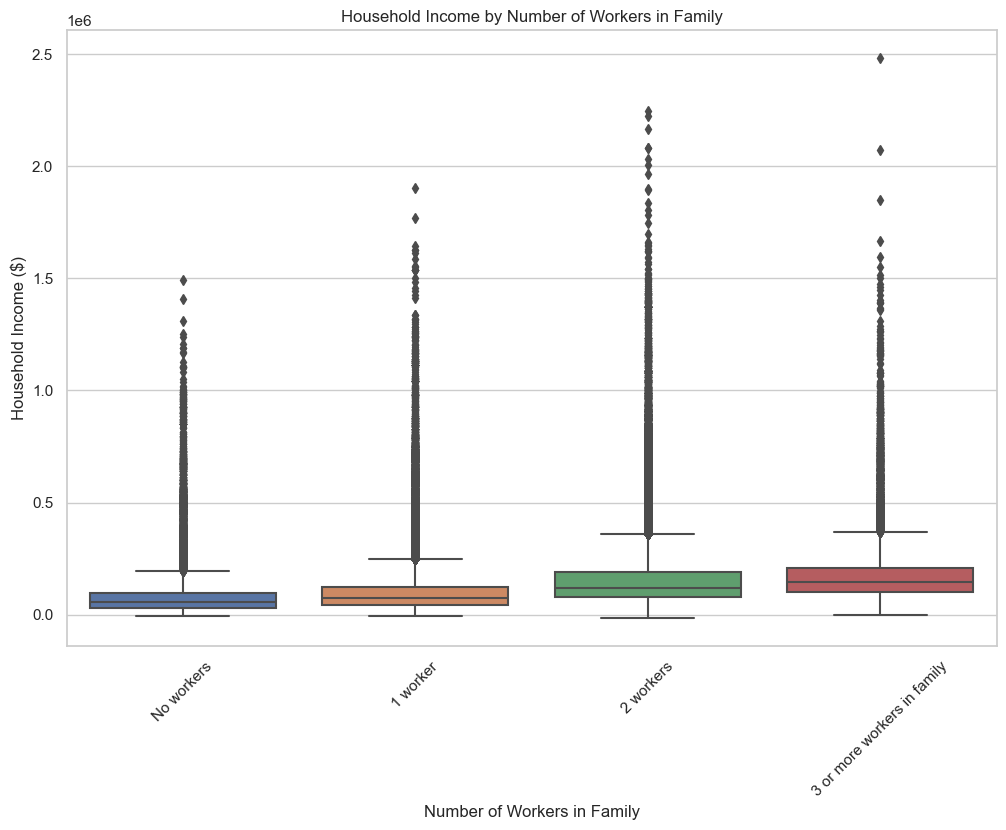

In [465]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='WIF_Label', y='HINCP', data=df3)
plt.title('Household Income by Number of Workers in Family')
plt.xlabel('Number of Workers in Family')
plt.ylabel('Household Income ($)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [466]:
# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Specifically look at correlations with the encoded income category
income_correlation = correlation_matrix['HINCP'].sort_values()
income_correlation

OCPIP        -0.369718
WKEXREL      -0.309900
WORKSTAT     -0.302150
HHT          -0.265123
HHT2         -0.245030
TEN          -0.228760
ST           -0.110835
BLD          -0.108461
HHLDRAGEP    -0.089186
ACR          -0.036740
HHLDRHISP    -0.024760
HHLDRRAC1P   -0.012430
YRBLT         0.063070
NPF           0.084971
NOC           0.104572
ELEP          0.131258
NP            0.217043
WIF           0.244209
VEH           0.256962
RMSP          0.268153
INSP          0.273248
BDSP          0.288761
VALP          0.384899
SMOCP         0.484437
RNTP          0.492189
HINCP         1.000000
TYPEHUGQ           NaN
Name: HINCP, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


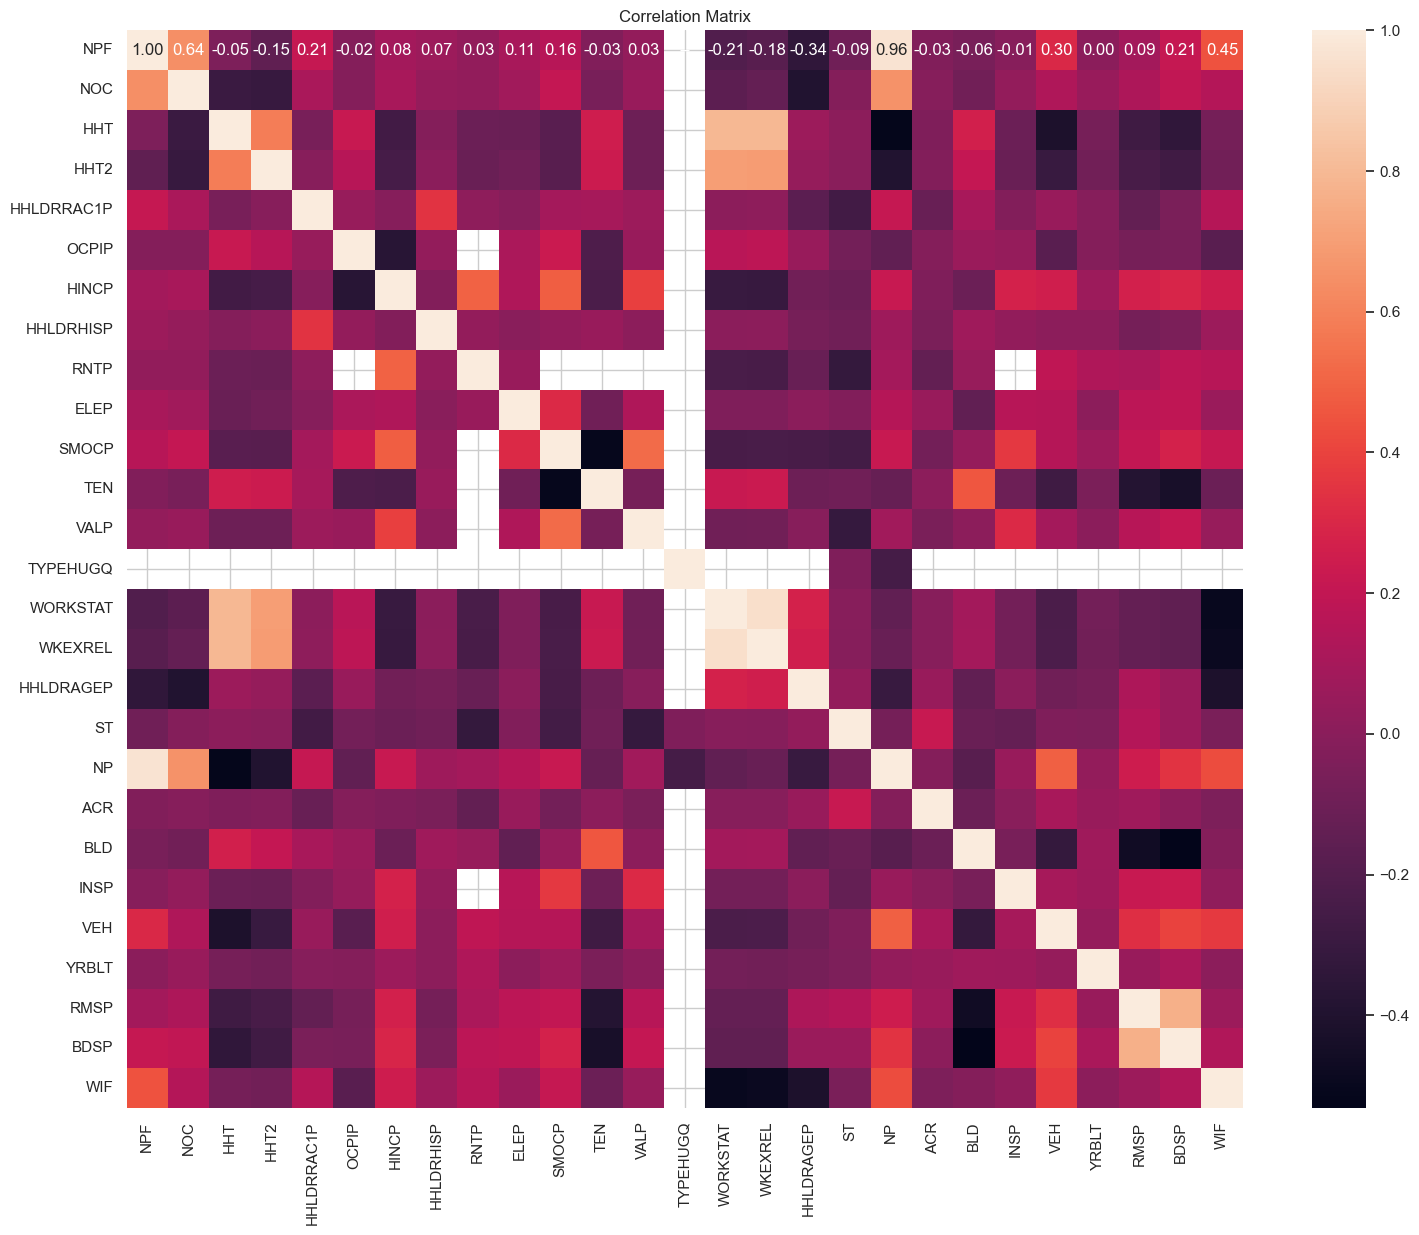

In [467]:
# Plotting a heatmap for visual inspection
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Data Preparation

## Missing Data

In [468]:
# Let's check the overall missing data situation across the entire dataset.
missing_data_overview = df2.isnull().sum().sort_values(ascending=False)

# Display the columns with missing data and the number of missing values
missing_data_overview[missing_data_overview > 0]

RNTP          332765
WORKSTAT      200704
NPF           198209
WKEXREL       198209
WIF           198209
OCPIP         185937
INSP          183455
SMOCP         183455
VALP          180869
ACR           139727
ELEP           89113
HHT            76335
VEH            76335
HINCP          76335
HHLDRAGEP      76335
HHT2           76335
NOC            76335
TEN            76335
HHLDRRAC1P     76335
HHLDRHISP      76335
BLD            48735
YRBLT          48735
RMSP           48735
BDSP           48735
dtype: int64

In [469]:
missing_data_overview / len(df2)

RNTP          0.757574
WORKSTAT      0.456923
NPF           0.451243
WKEXREL       0.451243
WIF           0.451243
OCPIP         0.423305
INSP          0.417654
SMOCP         0.417654
VALP          0.411767
ACR           0.318103
ELEP          0.202875
HHT           0.173784
VEH           0.173784
HINCP         0.173784
HHLDRAGEP     0.173784
HHT2          0.173784
NOC           0.173784
TEN           0.173784
HHLDRRAC1P    0.173784
HHLDRHISP     0.173784
BLD           0.110950
YRBLT         0.110950
RMSP          0.110950
BDSP          0.110950
ST            0.000000
NP            0.000000
TYPEHUGQ      0.000000
dtype: float64

In [470]:
df2.drop(columns=['TYPEHUGQ'], inplace=True)

C:\Users\rahul\AppData\Local\Temp\ipykernel_21412\4033570820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns=['TYPEHUGQ'], inplace=True)


**Droping the null values in the HINCP column**

In [471]:
df2 = df2.dropna(subset=['HINCP'])

**Imputing values using Simple imputer**

In [472]:
Median_columns=['NPF', 'OCPIP', 'INSP', 'SMOCP', 'VALP', 'ELEP', 'NOC','WIF','WORKSTAT','WKEXREL','ACR','RNTP']

# Impute numerical attributes with the median
numerical_imputer = SimpleImputer(strategy='median')
df2[Median_columns] = numerical_imputer.fit_transform(df2[Median_columns])
df2[Median_columns] = df2[Median_columns].round(0)

**Removing Outliers from the Household income variable**

In [473]:
# Calculate the 1st quartile and the 3rd quartile
Q1 = df2['HINCP'].quantile(0.25)
Q3 = df2['HINCP'].quantile(0.75)
IQR = Q3 - Q1

# Determine bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers based on defined bounds
df_filtered = df2[(df2['HINCP'] >= lower_bound) & (df2['HINCP'] <= upper_bound)]

# Optionally, check how many rows remain
print("Original DataFrame size:", len(df2))
print("Filtered DataFrame size without outliers:", len(df_filtered))

Original DataFrame size: 362916
Filtered DataFrame size without outliers: 339490


### Prepped Data Review

**applying log transformation for the household income column**

In [474]:
df2['HINCP_log'] = np.log1p(df2['HINCP'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


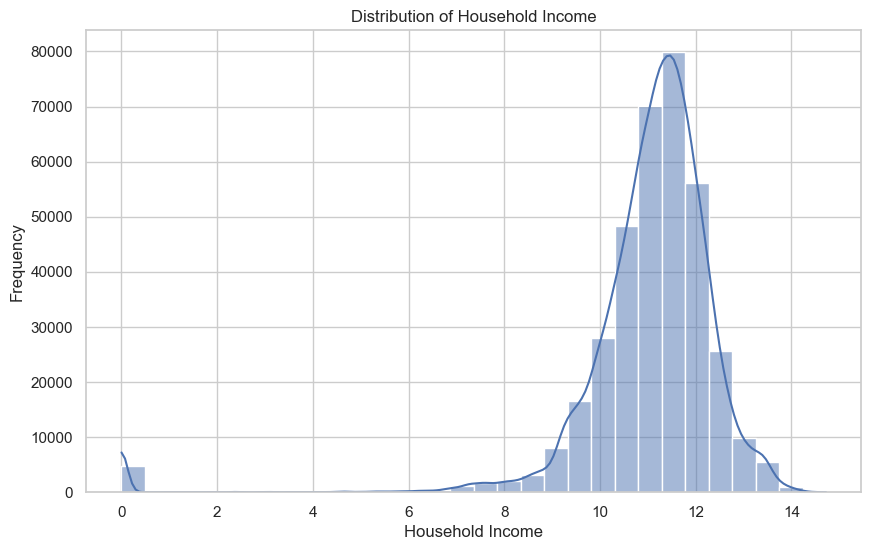

In [475]:

plt.figure(figsize=(10, 6))
sns.histplot(df2['HINCP_log'], kde=True, bins=30)
plt.title('Distribution of Household Income')
plt.xlabel('Household Income')
plt.ylabel('Frequency')
plt.show()

In [476]:
df2 = df2.dropna(subset=['HINCP_log'])

In [477]:
# Use quantile to define bin edges for equal-sized bins
bin_edges = df2['HINCP'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Categorize the 'HINCP' column into five groups
df2['Income_Category'] = pd.cut(df2['HINCP'], bins=bin_edges, labels=[0, 1, 2, 3, 4], include_lowest=True)

# Check the first few entries to confirm
print(df2[['HINCP', 'Income_Category']].head())


           HINCP Income_Category
102944   11600.0               0
102945   81000.0               2
102946  147700.0               3
102947  163000.0               4
102948  133300.0               3


**Creating a categorical variable for our analysis of household income**

In [478]:
# Use quantile to define bin edges for equal-sized bins
bin_edges = df2['HINCP'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values

# Categorize the 'HINCP' column into five groups
df2['Income_Category'] = pd.cut(df2['HINCP'], bins=bin_edges, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], include_lowest=True)

# Check the first few entries to confirm
print(df2[['HINCP', 'Income_Category']].head())



           HINCP Income_Category
102944   11600.0        Very Low
102945   81000.0          Medium
102946  147700.0            High
102947  163000.0       Very High
102948  133300.0            High


In [479]:
df2.head()

,NPF,NOC,HHT,HHT2,HHLDRRAC1P,OCPIP,HINCP,HHLDRHISP,RNTP,ELEP,...,ACR,BLD,INSP,VEH,YRBLT,RMSP,BDSP,WIF,HINCP_log,Income_Category
102944,3.0,0.0,4.0,9.0,6.0,17.0,11600.0,1.0,270.0,40.0,...,1.0,9.0,1100.0,0.0,1939.0,3.0,1.0,2.0,9.358847,Very Low
102945,2.0,0.0,1.0,2.0,6.0,6.0,81000.0,1.0,1400.0,80.0,...,1.0,2.0,1200.0,2.0,1940.0,7.0,3.0,0.0,11.302217,Medium
102946,2.0,0.0,1.0,2.0,1.0,25.0,147700.0,1.0,1400.0,50.0,...,1.0,2.0,190.0,1.0,2000.0,6.0,3.0,0.0,11.902945,High
102947,3.0,0.0,4.0,9.0,9.0,14.0,163000.0,1.0,1400.0,50.0,...,1.0,7.0,800.0,2.0,1960.0,4.0,2.0,2.0,12.001512,Very High
102948,2.0,0.0,3.0,7.0,1.0,18.0,133300.0,1.0,1400.0,110.0,...,1.0,2.0,2100.0,1.0,1980.0,8.0,2.0,1.0,11.800365,High


**Removing Outliers from other columns for our analysis**

In [480]:
# List of columns from which to remove outliers
columns_to_filter = [ 'WIF', 'RMSP', 'BDSP', 'VALP','RNTP','SMOCP','VALP']

def remove_outliers(df2, columns):
    for column in columns:
        # Calculate the IQR for each column
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply the filter with the bounds
        df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]

    return df2

# Apply the function to your dataframe
df2 = remove_outliers(df2, columns_to_filter)

<class 'pandas.core.frame.DataFrame'>
Index: 200428 entries, 102946 to 775342
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   NPF              200428 non-null  float64 
 1   NOC              200428 non-null  float64 
 2   HHT              200428 non-null  float64 
 3   HHT2             200428 non-null  float64 
 4   HHLDRRAC1P       200428 non-null  float64 
 5   OCPIP            200428 non-null  float64 
 6   HINCP            200428 non-null  float64 
 7   HHLDRHISP        200428 non-null  float64 
 8   RNTP             200428 non-null  float64 
 9   ELEP             200428 non-null  float64 
 10  SMOCP            200428 non-null  float64 
 11  TEN              200428 non-null  float64 
 12  VALP             200428 non-null  float64 
 13  WORKSTAT         200428 non-null  float64 
 14  WKEXREL          200428 non-null  float64 
 15  HHLDRAGEP        200428 non-null  float64 
 16  ST               200

**Standaradizing the data using standardscalar function**

In [481]:
scaler = StandardScaler()
df2[['NPF', 'NOC', 'OCPIP', 'RNTP', 'ELEP', 'SMOCP', 'VALP', 'HHLDRAGEP', 'VEH', 'YRBLT', 'RMSP', 'BDSP']] = scaler.fit_transform(df2[['NPF', 'NOC', 'OCPIP','RNTP', 'ELEP', 'SMOCP', 'VALP', 'HHLDRAGEP', 'VEH', 'YRBLT', 'RMSP', 'BDSP']])


**creating new categorical column for no of persons(NP) column in house hold**

In [482]:
# Define custom range-based bins
bins = [0, 1, 2, 4, 6, float('inf')]  # Note: 0 is included to cover any unexpected zero values.
labels = ['Single', 'Couple', 'Small Family', 'Medium Family', 'Large Family']

# Categorize the 'NP' column into family types
df2['Family_Type'] = pd.cut(df2['NP'], bins=bins, labels=labels, include_lowest=True)

# Check the first few entries to confirm
print(df2[['NP', 'Family_Type']].head())

        NP    Family_Type
102946   2         Couple
102955   6  Medium Family
102957   2         Couple
102960   2         Couple
102961   2         Couple


**Converting Tenure Column into a categorical column with the below categorization**
* "0": "N/A  (GQ/vacant)",
* "1": "Owned with mortgage or loan (include home equity loans)",
* "2": "Owned Free And Clear",
* "3": "Rented",
* "4": "Occupied without payment of rent"

In [483]:
ten_mapping = {
    0: "V",    # Vacant
    1: "OWL",  # Owner with loan
    2: "O",    # Owner
    3: "R",    # Renter
    4: "ILO"   # Illeagally occupied
}

# Apply the mapping to the 'TEN' column
df2['TEN'] = df2['TEN'].map(ten_mapping)

# Check the conversion was successful
print(df2['TEN'].head())

102946    OWL
102955    OWL
102957    OWL
102960      O
102961    OWL
Name: TEN, dtype: object


**Creating a categorical variable for Workers in family(WIF) column based on the below categorization**

* "0": "No workers",
* "1": "1 worker",
* "2": "2 workers",
* "3": "3 or more workers in family"

In [484]:
wif_mapping = {
    0: "Nobody",
    1: "Single",
    2: "Duo",
    3: "Multiple"
}

# Apply the mapping to the 'WIF' column
df2['WIF'] = df2['WIF'].map(wif_mapping)

# Optionally handle any NaNs or values outside of 0-3 if they exist
df2['WIF'] = df2['WIF'].fillna("Unknown")

# Check the conversion was successful
print(df2['WIF'].head())

102946    Nobody
102955    Single
102957    Single
102960    Nobody
102961    Nobody
Name: WIF, dtype: object


**Converting ACR column to a categorical column with below Categories**

* "0": "N/A (GQ/not a one-family house or mobile home)",
* "1": "House on less than one acre",
* "2": "House on one to less than ten acres",
* "3": "House on ten or more acres"


In [485]:
acr_mapping = {
    0: "V",  # Mobile Home
    1: "T",  # TownHouse
    2: "M",  # Mansion
    3: "F"   # Fort
}

# Apply the mapping to the 'ACR' column
df2['ACR'] = df2['ACR'].map(acr_mapping)

# Check the conversion was successful
print(df2['ACR'].head())

102946    T
102955    T
102957    T
102960    T
102961    T
Name: ACR, dtype: object


**Mapping state name to the state code**

In [486]:
# State code to name mapping
state_mapping = {
    "12": "Florida",
    "13": "Georgia",
    "17": "Illinois",
    "26": "Michigan",
    "06": "California"
}

# Ensure the 'ST' column is a string, then map state codes to state names
df2['ST'] = df2['ST'].astype(str).str.zfill(2)  # Pad single-digit codes with a leading zero
df2['ST'] = df2['ST'].map(state_mapping)

# Check the operation was successful
print(df2['ST'].head())


102946    California
102955    California
102957    California
102960    California
102961    California
Name: ST, dtype: object


In [487]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200428 entries, 102946 to 775342
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   NPF              200428 non-null  float64 
 1   NOC              200428 non-null  float64 
 2   HHT              200428 non-null  float64 
 3   HHT2             200428 non-null  float64 
 4   HHLDRRAC1P       200428 non-null  float64 
 5   OCPIP            200428 non-null  float64 
 6   HINCP            200428 non-null  float64 
 7   HHLDRHISP        200428 non-null  float64 
 8   RNTP             200428 non-null  float64 
 9   ELEP             200428 non-null  float64 
 10  SMOCP            200428 non-null  float64 
 11  TEN              200428 non-null  object  
 12  VALP             200428 non-null  float64 
 13  WORKSTAT         200428 non-null  float64 
 14  WKEXREL          200428 non-null  float64 
 15  HHLDRAGEP        200428 non-null  float64 
 16  ST               200

**Copying the data frame for futher anayalsis and droping the HINCP**

In [619]:
df4=df2.copy()
df4['TEN']

102946    OWL
102955    OWL
102957    OWL
102960      O
102961    OWL
         ... 
775334      O
775335    OWL
775339    OWL
775340      O
775342    OWL
Name: TEN, Length: 200428, dtype: object

**Hot encoding all my categorical variables**

**Dropped HINCP colum cause i have already created my new outcome variable**

In [620]:
df4.drop(columns=['HINCP','HINCP_log'], inplace=True)
df4.head()

,NPF,NOC,HHT,HHT2,HHLDRRAC1P,OCPIP,HHLDRHISP,RNTP,ELEP,SMOCP,...,ACR,BLD,INSP,VEH,YRBLT,RMSP,BDSP,WIF,Income_Category,Family_Type
102946,-0.903974,-0.431114,1.0,2.0,1.0,0.068158,1.0,0.0,-0.783968,2.398131,...,T,2.0,190.0,-0.916285,1.150397,-0.050392,0.125033,Nobody,High,Couple
102955,3.040203,4.550138,1.0,1.0,1.0,0.206027,4.0,0.0,2.639819,2.934781,...,T,2.0,2400.0,0.046524,0.241441,-0.050392,1.426252,Single,High,Medium Family
102957,-0.903974,-0.431114,1.0,2.0,1.0,0.665590,1.0,0.0,0.149792,-0.098458,...,T,2.0,3000.0,0.046524,1.604875,-0.050392,0.125033,Single,Low,Couple
102960,-0.903974,-0.431114,1.0,2.0,6.0,-0.850969,1.0,0.0,0.087542,-0.824361,...,T,2.0,1000.0,0.046524,-1.576472,-1.172414,-1.176185,Nobody,High,Couple
102961,-0.903974,-0.431114,1.0,2.0,1.0,1.079197,1.0,0.0,-0.472714,2.162213,...,T,2.0,6000.0,1.009334,-1.576472,1.071631,1.426252,Nobody,Medium,Couple


###  LinearDiscriminantAnalysis

In [621]:
print(df4.select_dtypes(include=[np.number]).columns.tolist())

['NPF', 'NOC', 'HHT', 'HHT2', 'HHLDRRAC1P', 'OCPIP', 'HHLDRHISP', 'RNTP', 'ELEP', 'SMOCP', 'VALP', 'WORKSTAT', 'WKEXREL', 'HHLDRAGEP', 'NP', 'BLD', 'INSP', 'VEH', 'YRBLT', 'RMSP', 'BDSP']


In [622]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [623]:
# Define the target and features
target = 'Income_Category'
features = ['NPF', 'NOC', 'HHT', 'HHT2', 'HHLDRRAC1P', 'OCPIP', 'HHLDRHISP', 'RNTP', 'ELEP', 'SMOCP', 
            'VALP', 'WORKSTAT', 'WKEXREL', 'HHLDRAGEP', 'ST', 'NP', 'ACR', 'BLD', 'INSP', 'VEH', 'YRBLT', 'RMSP', 'BDSP', 'WIF']
features = [col for col in features if df4[col].dtype in [np.int64, np.float64]]

# Ensure all features are numerical, encoding if necessary
# For simplicity, we're scaling all numeric features; adjust as needed for categorical encoding
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df4[features])

# Encode the categorical target variable if it's not already numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_target = encoder.fit_transform(df4[target])


In [624]:
n_classes = df4[target].nunique()
lda = LDA(n_components=min(n_classes - 1, len(features)))  # The max components you can have is n_classes-1

# Fit LDA
df_lda = lda.fit_transform(df_scaled, df_target)

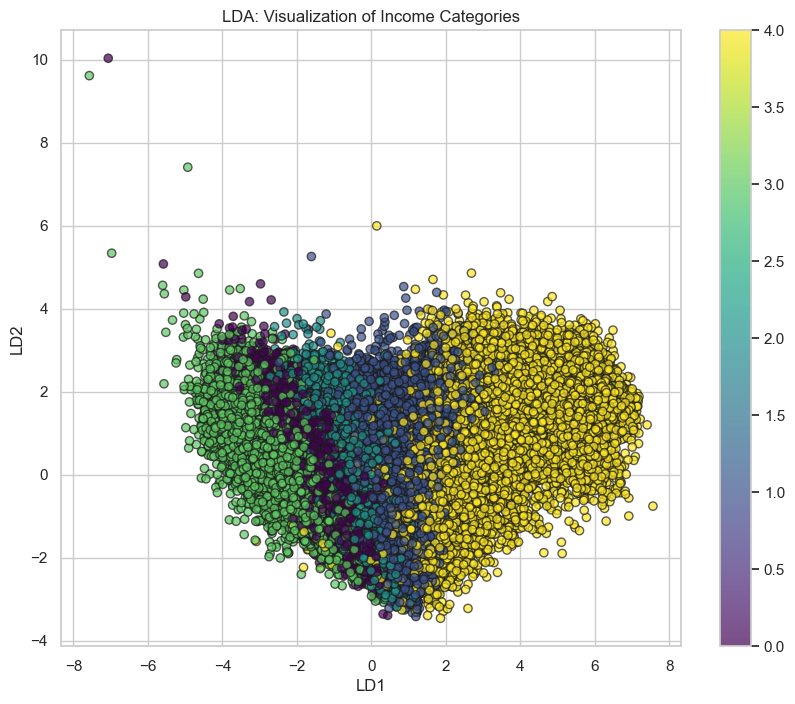

In [625]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_lda[:, 0], df_lda[:, 1], c=df_target, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.colorbar(scatter)
plt.title('LDA: Visualization of Income Categories')
plt.show()

In [626]:
print("Number of samples in df_features:", len(df_features))
print("Number of samples in df_target:", len(df_target))

Number of samples in df_features: 26
Number of samples in df_target: 200428


### RandomForest Feature Selection

In [627]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [628]:
# Define target and feature columns
target = 'Income_Category'  # Update with your actual target column
features = df4.columns.drop(target)  # Exclude the target column from the features

df_encoded = df4.copy()
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or df_encoded[col].nunique() < 20:  # Assuming categorical columns
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Separate features and target
X = df_encoded[features]
y = df_encoded[target].astype('category')

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [629]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as necessary

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [630]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame to visualize them
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

        Feature  Importance
5         OCPIP    0.323717
9         SMOCP    0.209180
11         VALP    0.057445
14    HHLDRAGEP    0.046515
8          ELEP    0.042019
19         INSP    0.038602
21        YRBLT    0.028344
22         RMSP    0.025182
20          VEH    0.020823
15           ST    0.019661
10          TEN    0.019101
16           NP    0.019035
13      WKEXREL    0.018741
12     WORKSTAT    0.017876
3          HHT2    0.016831
18          BLD    0.014226
23         BDSP    0.013806
4    HHLDRRAC1P    0.012630
24          WIF    0.012400
2           HHT    0.009466
6     HHLDRHISP    0.008350
17          ACR    0.008092
0           NPF    0.006906
25  Family_Type    0.006036
1           NOC    0.005015
7          RNTP    0.000000


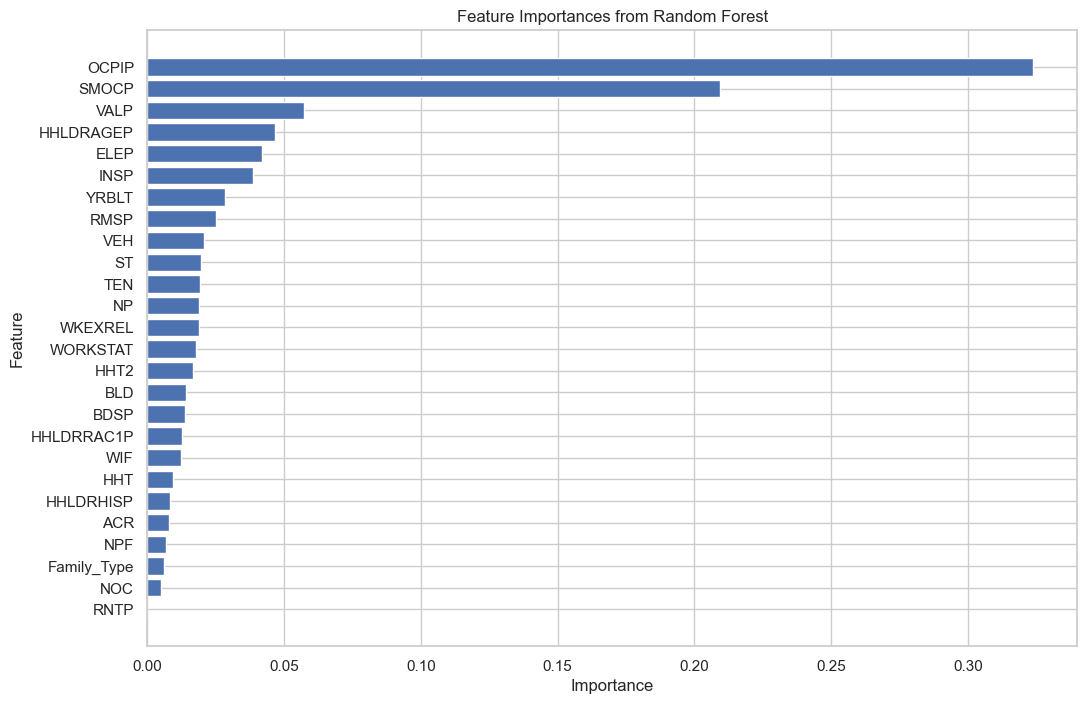

In [631]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important features on top
plt.show()


## Building Models

### RandomForest Model

In [658]:
categorical_cols = ['ST', 'TEN']
numerical_cols = ['OCPIP', 'SMOCP', 'VALP', 'HHLDRAGEP', 'ELEP', 'INSP', 'YRBLT', 'RMSP', 'VEH', 'NP']

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessing for numerical data (optional since RandomForest does not necessarily require it)
numeric_transformer = StandardScaler()

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [659]:
X_train, X_test, y_train, y_test = train_test_split(df4[numerical_cols + categorical_cols], df4['Income_Category'], test_size=0.3, random_state=42)

In [660]:
# Setup the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that first preprocesses the data then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', rf_classifier)])


pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['OCPIP', 'SMOCP', 'VALP',
                                                   'HHLDRAGEP', 'ELEP', 'INSP',
                                                   'YRBLT', 'RMSP', 'VEH',
                                                   'NP']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ST', 'TEN'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [661]:
# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9063014518784613
Classification Report:
               precision    recall  f1-score   support

        High       0.90      0.91      0.91     13393
         Low       0.88      0.91      0.89     13059
      Medium       0.89      0.89      0.89     13552
   Very High       0.96      0.91      0.94      9030
    Very Low       0.93      0.90      0.91     11095

    accuracy                           0.91     60129
   macro avg       0.91      0.91      0.91     60129
weighted avg       0.91      0.91      0.91     60129



**XG Boost modelling**

In [644]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [662]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels in the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the labels in the testing set
y_test_encoded = label_encoder.transform(y_test)

In [663]:
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

# Train the XGBoost model using the encoded target variable
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print("XGB_Model accuracy:", accuracy)

XGB_Model accuracy: 0.9321292554341499


In [664]:
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13393
           1       0.91      0.94      0.92     13059
           2       0.93      0.92      0.92     13552
           3       0.96      0.95      0.95      9030
           4       0.93      0.94      0.94     11095

    accuracy                           0.93     60129
   macro avg       0.93      0.93      0.93     60129
weighted avg       0.93      0.93      0.93     60129



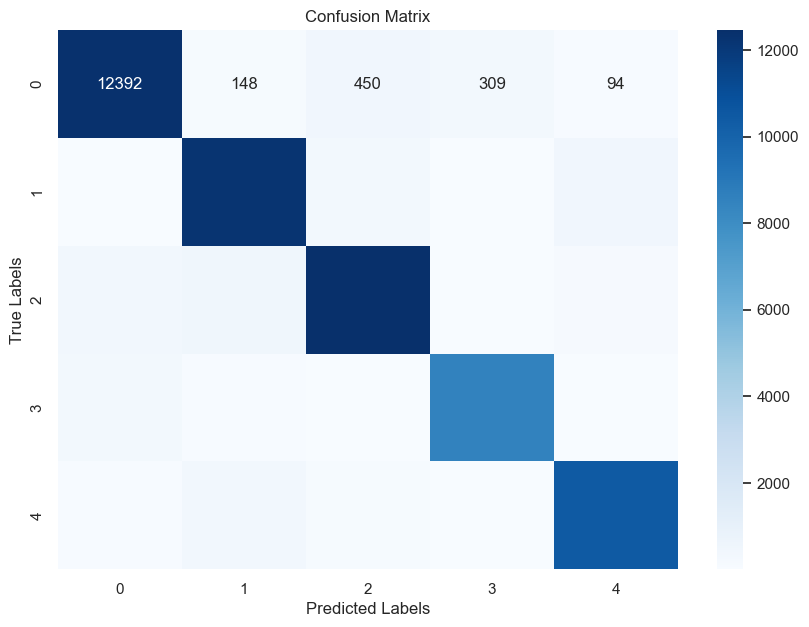

In [665]:
# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Neural Network modelling

In [652]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [538]:
# Separate features and target variable
X2 = df4[numerical_cols + categorical_cols]
y2 = df4['Income_Category']  

# One-hot encode categorical data
X2 = pd.get_dummies(X2, columns=categorical_cols)

# Scale numerical features
scaler = StandardScaler()
X2[numerical_cols] = scaler.fit_transform(X2[numerical_cols])

# Encode labels to categorical
y2 = pd.get_dummies(y2)


In [539]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [540]:
# Define the model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X2_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(y2_train.shape[1], activation='softmax'))  # Output layer; ensure activation is 'softmax' for multi-class

# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\rahul\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [541]:
# Fit the model
history = nn_model.fit(X2_train, y2_train, epochs=50, batch_size=32, validation_data=(X2_test, y2_test))

Epoch 1/50
4385/4385 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7562 - loss: 0.6250 - val_accuracy: 0.9171 - val_loss: 0.2317
Epoch 2/50
4385/4385 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9144 - loss: 0.2219 - val_accuracy: 0.9227 - val_loss: 0.1978
Epoch 3/50
4385/4385 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9208 - loss: 0.1992 - val_accuracy: 0.9232 - val_loss: 0.1896
Epoch 4/50
4385/4385 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9221 - loss: 0.1917 - val_accuracy: 0.9238 - val_loss: 0.1869
Epoch 5/50
4385/4385 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9235 - loss: 0.1856 - val_accuracy: 0.9229 - val_loss: 0.1854
Epoch 6/50
4385/4385 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9245 - loss: 0.1821 - val_accuracy: 0.9203 - val_loss: 0.1889
Epoch 7/50
4385/4385 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9232 - loss: 0.1820 - val_accuracy: 0.9267 - val_loss: 0.1735
Epoch 8/50
4385/4385 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9260 - loss: 0.1773 - 

In [542]:
# Evaluate the model
loss, accuracy = nn_model.evaluate(X2_test, y2_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1880/1880 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.9318 - loss: 0.1564
Loss: 0.15692271292209625, Accuracy: 0.9316968321800232


In [545]:
# Predict class probabilities
probabilities = nn_model.predict(X2_test)

# Convert probabilities to class labels
y2_pred = np.argmax(probabilities, axis=1)
y2_true = np.argmax(y2_test.values, axis=1)

1880/1880 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step


In [546]:
# Calculate accuracy
accuracy = accuracy_score(y2_true, y2_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9316968517686973


In [547]:
# Generate classification report
print("Classification Report:")
print(classification_report(y2_true, y2_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11095
           1       0.91      0.93      0.92     13059
           2       0.94      0.92      0.93     13552
           3       0.94      0.92      0.93     13393
           4       0.95      0.95      0.95      9030

    accuracy                           0.93     60129
   macro avg       0.93      0.93      0.93     60129
weighted avg       0.93      0.93      0.93     60129



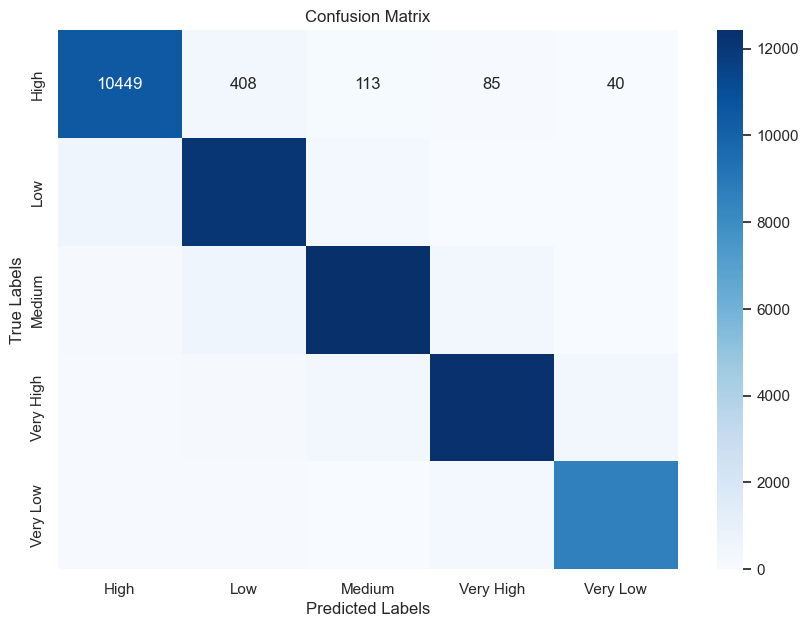

In [548]:
# Generate confusion matrix
cm = confusion_matrix(y2_true, y2_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

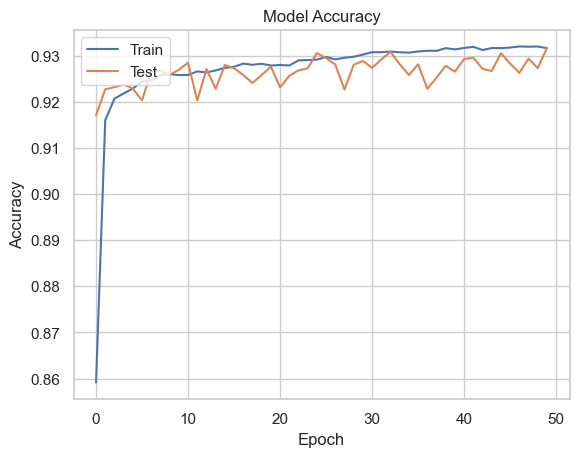

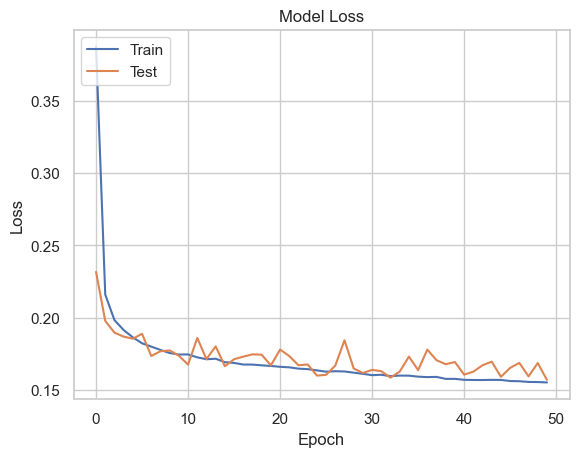

In [549]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model Selection

**XGBoost** model exhibits the highest accuracy at approximately 93.21%, closely followed by the neural network model at about 93.17%. The Random Forest model shows a lower accuracy of 90.63% compared to the other two models. The ensemble model, which averages the predictions of all three individual models, has an accuracy very close to that of the XGBoost and neural network models, at about 93.19%.

**Preferred Model: XGBoost**

**Justification:**

Highest Accuracy: The XGBoost model has the highest standalone accuracy among the individual models. This suggests that it is the most effective at generalizing from the training data to the test data within this specific dataset and problem context.
Efficiency and Scalability: XGBoost is known for its efficiency in execution speed and system resource usage, especially when dealing with large datasets. If the deployment environment requires high throughput or faces resource constraints, XGBoost might be more suitable.
Interpretability: XGBoost often provides better interpretability than neural networks, which can be important in many practical applications where understanding the decision-making process of the model is crucial. This is due to the ability to examine feature importances directly in the XGBoost model.
Robustness: XGBoost is less likely to overfit compared to neural networks, especially when appropriate regularization techniques are employed. It also handles a mix of numerical and categorical features effectively, especially with its built-in capabilities to manage categorical data.


**Considerations for the Ensemble Model:**

While the ensemble model shows a slight improvement over the Random Forest model, it does not significantly outperform the best single model (XGBoost). Typically, the purpose of an ensemble model is to combine different modeling approaches to overcome their individual limitations and improve overall performance. However, in this case, the ensemble does not provide substantial benefits over the best single model.
Ensemble models can be more complex to deploy and maintain because they involve managing multiple underlying models and additional logic to combine their outputs. If the performance gain over a single model is negligible, the increased complexity might not be justified.justified.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels in the training set
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the labels in the testing set
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
])

# Train the XGBoost model using the encoded target variable
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print("XGB_Model accuracy:", accuracy)

In [ ]:
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

### Ensemble Model

In [666]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [673]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Categorical and numerical columns
categorical_cols = ['ST', 'TEN']  # Assuming 'ST' contains states like 'Florida'
numerical_cols = ['OCPIP', 'SMOCP', 'VALP', 'HHLDRAGEP', 'ELEP', 'INSP', 'YRBLT', 'RMSP', 'VEH', 'NP']

# Define the transformer for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply transformations
X = preprocessor.fit_transform(df4[numerical_cols + categorical_cols])
y = pd.get_dummies(df4['Income_Category'])  # Assuming 'Income_Category' is the target

X3_train, X3_test, y3_train, y3_test = train_test_split(df4[numerical_cols + categorical_cols], df4['Income_Category'], test_size=0.3, random_state=42)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [668]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural network architecture
nn_model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

C:\Users\rahul\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3508/3508 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.7334 - loss: 0.6786 - val_accuracy: 0.8982 - val_loss: 0.2590
Epoch 2/50
3508/3508 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9126 - loss: 0.2329 - val_accuracy: 0.9114 - val_loss: 0.2234
Epoch 3/50
3508/3508 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9191 - loss: 0.2059 - val_accuracy: 0.9185 - val_loss: 0.2004
Epoch 4/50
3508/3508 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9218 - loss: 0.1963 - val_accuracy: 0.9215 - val_loss: 0.1957
Epoch 5/50
3508/3508 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9232 - loss: 0.1912 - val_accuracy: 0.9159 - val_loss: 0.2071
Epoch 6/50
3508/3508 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9227 - loss: 0.1911 - val_accuracy: 0.9179 - val_loss: 0.1974
Epoch 7/50
3508/3508 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9248 - loss: 0.1837 - val_accuracy: 0.9164 - val_loss: 0.1971
Epoch 8/50
3508/3508 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9258 - loss: 0

In [669]:
from xgboost import XGBClassifier

# XGBoost model configuration
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train XGBoost
xgb_model.fit(X_train, np.argmax(y_train, axis=1))  # Ensure y_train is correctly formatted if needed

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [676]:

rf2_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf2_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf2_classifier)
])
rf2_pipeline.fit(X3_train, y3_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['OCPIP', 'SMOCP', 'VALP',
                                                   'HHLDRAGEP', 'ELEP', 'INSP',
                                                   'YRBLT', 'RMSP', 'VEH',
                                                   'NP']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ST', 'TEN'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [677]:
# Predict probabilities
nn_probs = nn_model.predict(X_test)
rf2_probs = rf2_pipeline.predict_proba(X3_test)
xgb_probs = xgb_model.predict_proba(X_test)

# Combine predictions
ensemble_probs = (xgb_probs + rf2_probs + nn_probs) / 3

# Convert combined probabilities to class predictions
combined_preds = np.argmax(combined_probs, axis=1)

# Evaluate ensemble
from sklearn.metrics import accuracy_score
print("Ensemble accuracy:", accuracy_score(np.argmax(y_test, axis=1), combined_preds))

1880/1880 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step
Ensemble accuracy: 0.931946315421843


## Conclusion 

Our project, titled "Exploring Socioeconomic and Housing Dynamics with Machine Learning to Predict Household Income," aimed to leverage the power of data science to derive meaningful insights from the extensive "American Community Survey 2022." Our analysis encompassed a well-considered selection of 50 features from a vast dataset, focusing on demographic, socioeconomic, and housing characteristics to understand and predict household income levels.

Throughout the study, we utilized advanced machine learning techniques to navigate through and analyze the data effectively. Initial exploratory data analysis provided us with a foundational understanding of the variables' distribution and their interrelationships, setting the stage for deeper inquiries into the patterns that govern household income levels.

The predictive model's performance was notably enhanced by preprocessing steps that included normalization, handling of missing values, and encoding categorical variables. Our chosen model was tested against a series of machine learning algorithms, among which the XGBoost model emerged as the most effective, reflecting the highest accuracy and robustness in handling various data types.

The results from our project are promising, indicating that machine learning models can indeed predict household income with a significant degree of accuracy using socio-demographic and housing data. This not only validates the efficacy of our analytical methodologies but also underscores the potential for such models to assist in socio-economic planning and policy-making.

Future Work

Based on our findings, we recommend further research into refining the models to enhance their predictive power and exploring additional datasets that could provide a broader context or capture dynamics over different time periods. It would also be beneficial to integrate more granified data regarding economic conditions, employment rates, and educational facilities to broaden the scope and depth of the predictive insights.

Model Recommendation

Considering the results and the comparative analysis of various models, we recommend the deployment of the XGBoost model for ongoing predictive analysis. Its superior performance, coupled with its ability to handle a large feature set efficiently, makes it well-suited for further application and development in similar socio-economic studies.